******CLIMATOLOGICAL DATA ANALYSIS******

Import the necessary modules

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate 
import numpy as np
import seaborn as sns

Load the datasets

In [46]:

ndvi_data = pd.read_csv('NDVI/ndvi_yearly/NDVI_2000_2022.csv')
precip_data = pd.read_csv('PRECIPITATION/precip_yearly/precip_2000_2022.csv')
ndwi_data = pd.read_csv('NDWI/ndwi_yearly/NDWI_2000_2022.csv')
temp_data = pd.read_csv('Land Surface Temp/lst_yearly/lst_2000_2022.csv')
sm_data = pd.read_csv('Soil Moisture/soil_moisture.csv')


Display the first few rows of each dataset to understand their structure


In [350]:
precip_data

system:time_start  precipitation
0          Jan 1, 2000         22.130
1          Jan 6, 2000         20.514
2         Jan 11, 2000         41.095
3         Jan 16, 2000          6.684
4         Jan 21, 2000          6.432
...                ...            ...
1651       Dec 6, 2022          9.779
1652      Dec 11, 2022         26.942
1653      Dec 16, 2022         30.939
1654      Dec 21, 2022         68.570
1655      Dec 26, 2022         68.483

[1656 rows x 2 columns]

In [351]:
temp_data

system:time_start  LST_Day_1km
0         Feb 18, 2000          NaN
1         Feb 26, 2000       31.057
2          Mar 5, 2000       27.379
3         Mar 13, 2000       26.829
4         Mar 21, 2000       27.529
...                ...          ...
1040       Oct 8, 2022       35.351
1041      Oct 16, 2022          NaN
1042      Oct 24, 2022       37.373
1043       Nov 1, 2022       35.563
1044       Nov 9, 2022       36.633

[1045 rows x 2 columns]

In [352]:
ndvi_data

system:time_start  00000000000000000000
0         Feb 18, 2000                 0.611
1         Feb 26, 2000                 0.631
2          Mar 5, 2000                 0.620
3         Mar 13, 2000                 0.625
4         Mar 21, 2000                 0.621
...                ...                   ...
2897      Dec 26, 2022                 0.548
2898      Dec 27, 2022                 0.573
2899      Dec 28, 2022                 0.585
2900      Dec 29, 2022                 0.586
2901      Dec 30, 2022                 0.586

[2902 rows x 2 columns]

In [353]:
ndwi_data

system:time_start  00000000000000000000
0         Feb 24, 2000                   NaN
1         Feb 25, 2000                   NaN
2         Feb 26, 2000                -0.031
3         Feb 27, 2000                -0.023
4         Feb 28, 2000                -0.000
...                ...                   ...
8264      Dec 26, 2022                 0.021
8265      Dec 27, 2022                 0.059
8266      Dec 28, 2022                 0.023
8267      Dec 29, 2022                 0.022
8268      Dec 30, 2022                -0.013

[8269 rows x 2 columns]

In [47]:
sm_data

system:time_start  surface SM  subsurface SM
Apr 2                2015      16.083         90.156
Apr 5                2015      18.254         91.816
Apr 8                2015      15.923         91.670
Apr 11               2015      17.282         90.976
Apr 14               2015      17.747         92.214
...                   ...         ...            ...
Jul 21               2022       3.837         23.117
Jul 24               2022       3.753         22.867
Jul 27               2022       3.705         22.632
Jul 30               2022       3.646         22.239
Aug 2                2022       3.571         22.020

[894 rows x 3 columns]

**RAINFALL**

The precipitation dataset contains columns for dates (system:time_start) and precipitation values (precipitation). The temperature dataset also has a date column (system:time_start) and a column for land surface temperature (LST_Day_1km).

To plot a thermo-pluviometric graph, which typically shows temperature and precipitation over time, I'll first need to process these datasets. This involves:

1. Converting the date columns in both datasets to a common datetime format for accurate comparison.
2. Merging these datasets on the date column to align the precipitation and temperature data.
3. Plotting a dual-axis graph with time on the x-axis, temperature on the left y-axis, and precipitation on the right y-axis.
Let's proceed with these steps

The thermo-pluviometric diagram displayed here represents the average monthly temperature and the average total monthly rainfall from January to December. This graph is created using the data from your datasets. The temperature (in degrees Celsius) is indicated by the red line, while the rainfall (in millimeters) is shown by the blue line. Each point on the graph corresponds to a month, with the left y-axis representing temperature and the right y-axis showing precipitation. This visualization offers a clear view of the average climate pattern over the course of a year. The x-axis shows the time in months, allowing for an easy comparison of the variations in temperature and precipitation over the observed period.

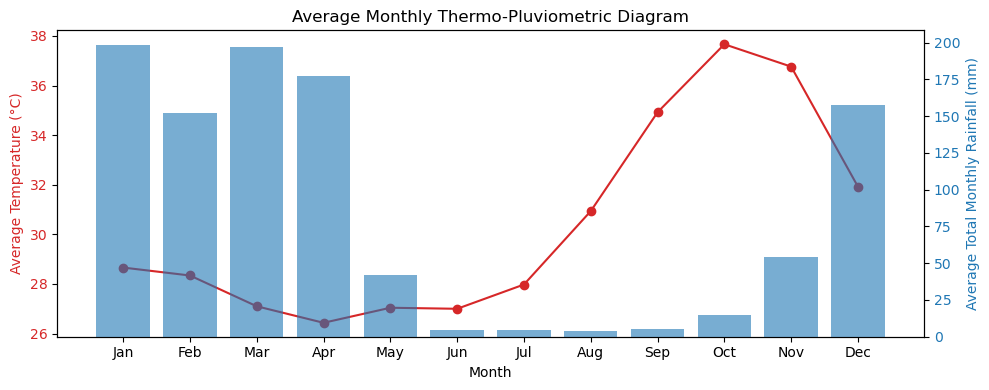

In [33]:
# Adjusting the plot to represent rainfall as bars
fig, ax1 = plt.subplots(figsize=(10, 4))

# Temperature plot
color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Temperature (°C)', color=color)
ax1.plot(avg_monthly_data['Month'], avg_monthly_data['Temperature'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# Precipitation plot as bars
color = 'tab:blue'
ax2.set_ylabel('Average Total Monthly Rainfall (mm)', color=color)
ax2.bar(avg_monthly_data['Month'], avg_monthly_data['Precipitation'], color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Average Monthly Thermo-Pluviometric Diagram')
plt.tight_layout()
plt.show()


The updated thermo-pluviometric diagram now shows the average monthly temperature as a line graph and the average total monthly rainfall as bars. The temperature data (in degrees Celsius) is represented by the red line, while the blue bars indicate the rainfall (in millimeters) for each month from January to December. This format visually distinguishes between the two types of data, providing a clear and concise representation of the average climate pattern throughout the year.

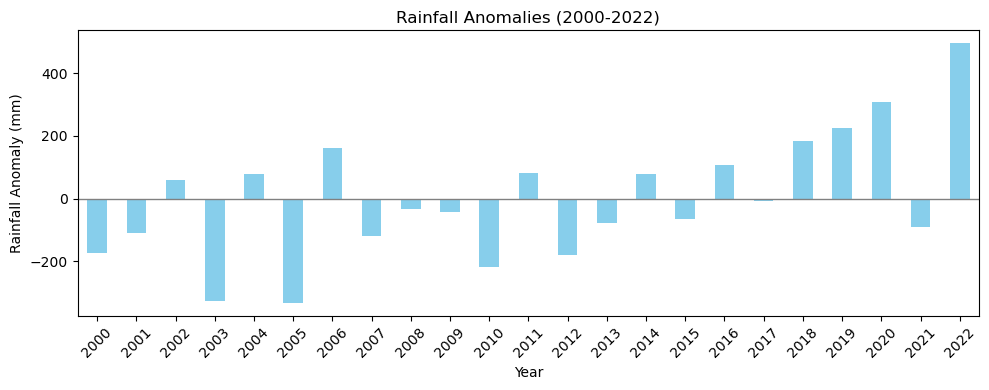

In [80]:
# Convert the date column to datetime format
precip_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])

# Resampling the data to get yearly totals
yearly_precip = precip_data.resample('Y', on='system:time_start').sum()

# Calculating the long-term mean
long_term_mean = yearly_precip['precipitation'].mean()

# Calculating the rainfall anomaly index (difference from the long-term mean)
rainfall_anomaly = yearly_precip['precipitation'] - long_term_mean

# Plotting the rainfall anomaly index
plt.figure(figsize=(10, 4))
rainfall_anomaly.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Rainfall Anomaly (mm)')
plt.title('Rainfall Anomalies (2000-2022)')
plt.axhline(0, color='gray', lw=1)
plt.xticks(ticks=range(len(rainfall_anomaly)), labels=[date.year for date in rainfall_anomaly.index], rotation=45)
plt.tight_layout()
plt.show()


The graph displays the rainfall anomaly index for each year from 2000 to 2022, derived from the provided dataset. This index measures the difference between the annual total rainfall and the long-term mean for the entire period. The bars represent the magnitude of the anomaly for each year, with positive values indicating years with higher than average rainfall and negative values for years with lower than average rainfall. The horizontal gray line represents the long-term mean, providing a reference point for comparison. The x-axis shows the years, and the y-axis measures the rainfall anomaly in millimeters.

ANNUAL RAINFALL

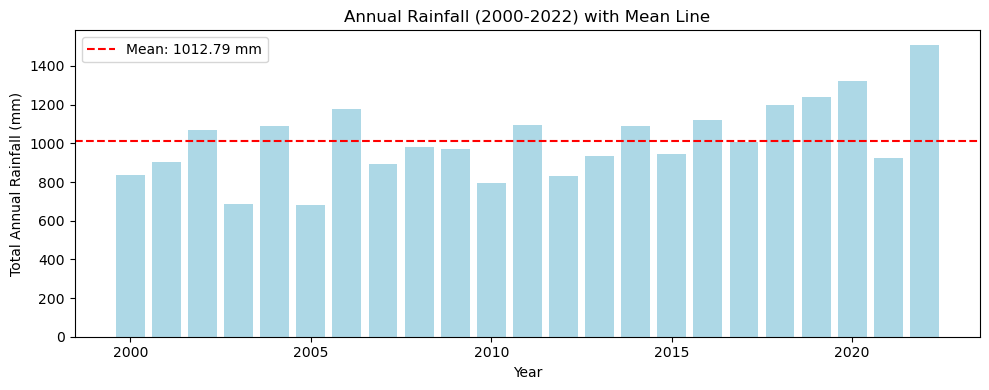

In [31]:

# Load the rainfall dataset
precip_data_path = 'PRECIPITATION/precip_yearly/precip_2000_2022.csv'
precip_data = pd.read_csv(precip_data_path)

# Convert the date column to datetime format
precip_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])

# Resampling the data to get yearly totals
yearly_precip = precip_data.resample('Y', on='system:time_start').sum()

# Calculating the long-term mean
long_term_mean = yearly_precip['precipitation'].mean()

# Plotting the annual rainfall and mean line
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(yearly_precip.index.year, yearly_precip['precipitation'], color='lightblue')
plt.axhline(long_term_mean, color='red', linestyle='--', label=f'Mean: {long_term_mean:.2f} mm')
plt.xlabel('Year')
plt.ylabel('Total Annual Rainfall (mm)')
plt.title('Annual Rainfall (2000-2022) with Mean Line')
plt.legend()
plt.tight_layout()
plt.show()


The graph represents the annual total rainfall from the year 2000 to 2022. Each bar corresponds to the total rainfall for a specific year, measured in millimeters. Additionally, the red dashed line indicates the long-term mean of annual rainfall over this period. This mean serves as a reference to compare each year's rainfall against the average, providing a clearer understanding of years with significantly higher or lower than average precipitation.

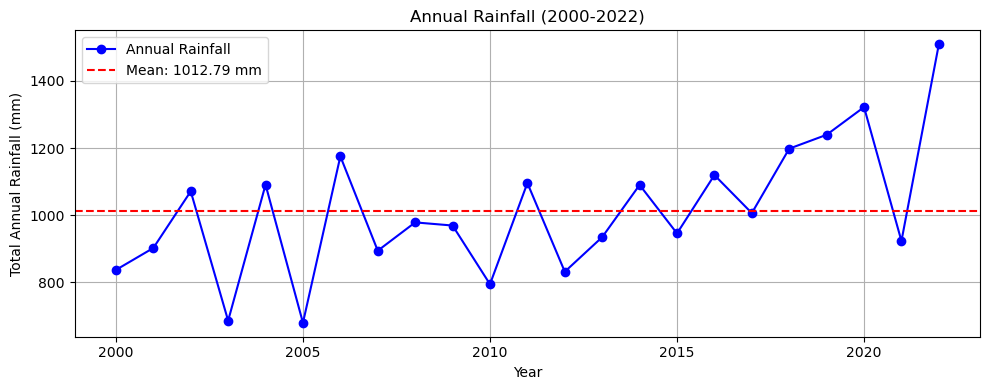

In [30]:
# Plotting the annual rainfall as a line graph and including the mean line
plt.figure(figsize=(10, 4))
plt.plot(yearly_precip.index.year, yearly_precip['precipitation'], marker='o', color='blue', label='Annual Rainfall')
plt.axhline(long_term_mean, color='red', linestyle='--', label=f'Mean: {long_term_mean:.2f} mm')
plt.xlabel('Year')
plt.ylabel('Total Annual Rainfall (mm)')
plt.title('Annual Rainfall (2000-2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The line graph shown here illustrates the annual total rainfall from 2000 to 2022. Each point on the blue line represents the total rainfall for a particular year, measured in millimeters. The red dashed line indicates the long-term mean of annual rainfall over this period. This visualization with a line graph provides a clear view of the trends and fluctuations in annual rainfall compared to the average, helping to identify years with exceptionally high or low precipitation.

/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_30135/3862787720.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_totals = precip_data.groupby(['Year', 'Month']).sum().reset_index()  # Replace 'sum' with your rainfall column name


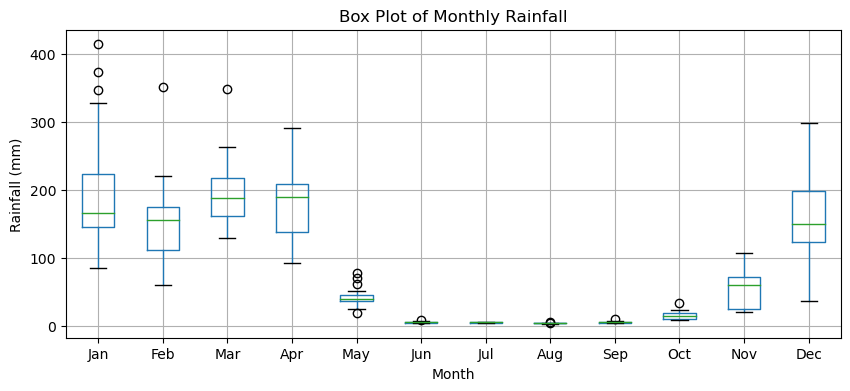

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the data
precip_data = pd.read_csv('PRECIPITATION/precip_yearly/precip_2000_2022.csv')  # Replace with your file path

# Convert the date column to datetime and extract month and year
precip_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])  # Replace 'Date' with your date column name
precip_data['Month'] = precip_data['system:time_start'].dt.month
precip_data['Year'] = precip_data['system:time_start'].dt.year

# Calculating monthly totals
monthly_totals = precip_data.groupby(['Year', 'Month']).sum().reset_index()  # Replace 'sum' with your rainfall column name

# Pivot the data
pivot_data = monthly_totals.pivot(index='Year', columns='Month', values='precipitation')  # Replace 'Rainfall' with your rainfall column name

# Plotting the box plot
plt.figure(figsize=(10, 4))
pivot_data.boxplot()
plt.title('Box Plot of Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.grid(True)
plt.show()


**TEMPERATURE**

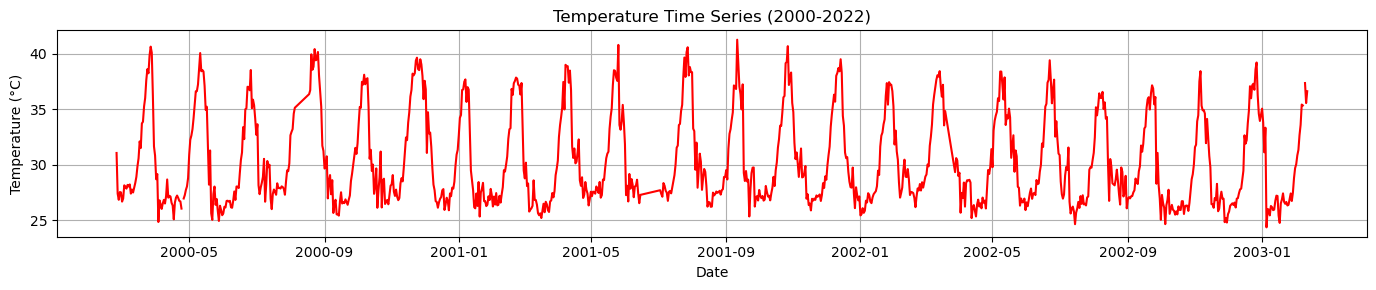

In [391]:
temp_data = temp_data.rename(columns={'LST_Day_1km': 'Temperature'})

temp_data['system:time_start'] = pd.to_datetime(ndwi_data['system:time_start'])

plt.figure(figsize=(14, 3))
plt.plot(temp_data['system:time_start'], temp_data['Temperature'], color='r')
plt.title('Temperature Time Series (2000-2022)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Temperature(°C)')

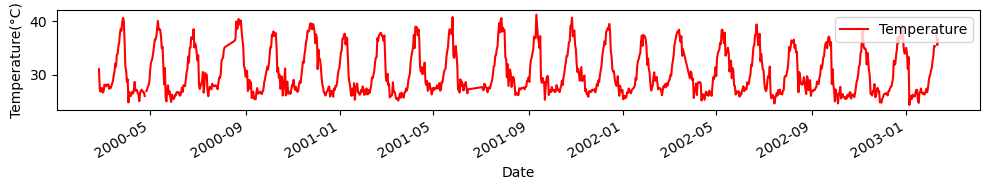

In [392]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

temp_data.plot(x='system:time_start', y='Temperature',color='red')
plt.xlabel('Date')
plt.ylabel('Temperature(°C)')

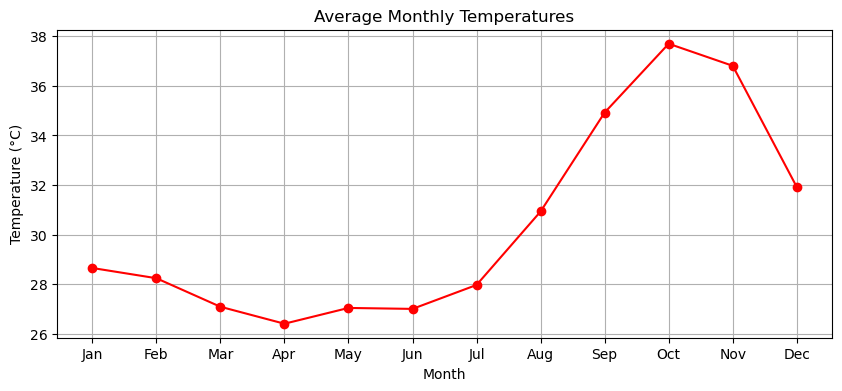

In [43]:
temp_data = pd.read_csv('Land Surface Temp/lst_yearly/lst_2000_2022.csv')  # Replace with your file path

# Convert the date column to datetime and extract month
temp_data['system:time_start'] = pd.to_datetime(temp_data['system:time_start'])  # Replace 'Date' with your date column name
temp_data['Month'] = temp_data['system:time_start'].dt.month

# Calculating average monthly temperatures
average_monthly_temp = temp_data.groupby('Month')['LST_Day_1km'].mean()  # Replace 'Temperature' with your temperature column name

# Plotting the average monthly temperatures
plt.figure(figsize=(10, 4))
plt.plot(average_monthly_temp.index, average_monthly_temp, marker='o', color='red')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Monthly Temperatures')
plt.grid(True)
plt.show()


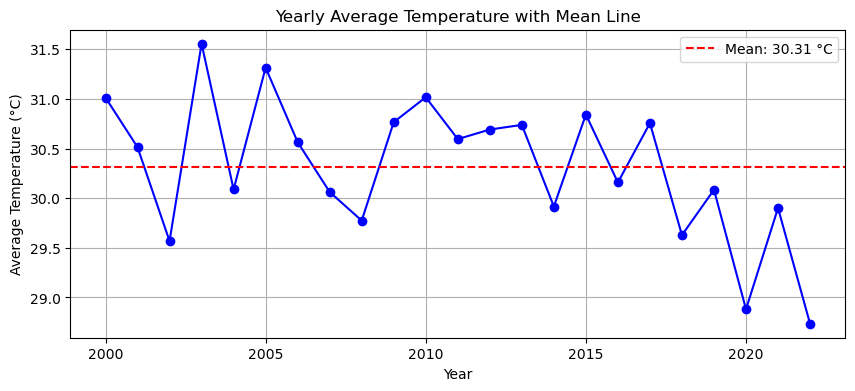

In [51]:
# Load the data
temp_data = pd.read_csv('Land Surface Temp/lst_yearly/lst_2000_2022.csv')  # Replace with your file path

# Convert the date column to datetime and extract the year
temp_data['system:time_start'] = pd.to_datetime(temp_data['system:time_start'])  # Replace 'Date' with your date column name
temp_data['Year'] = temp_data['system:time_start'].dt.year

# Calculating yearly average temperatures
average_yearly_temp = temp_data.groupby('Year')['LST_Day_1km'].mean()  # Replace 'Temperature' with your temperature column name

# Calculating the overall mean temperature
mean_temperature = average_yearly_temp.mean()

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(average_yearly_temp.index, average_yearly_temp, marker='o', color='blue')
plt.axhline(mean_temperature, color='red', linestyle='--', label=f'Mean: {mean_temperature:.2f} °C')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Yearly Average Temperature with Mean Line')
plt.legend()
plt.grid(True)
plt.show()

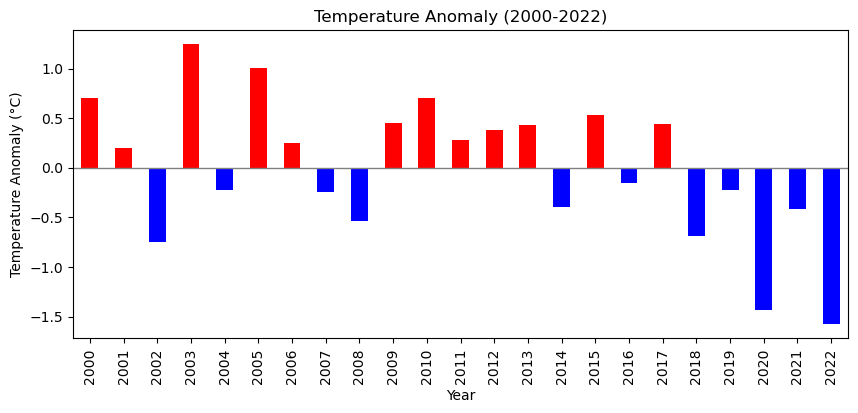

In [55]:
# Calculating yearly average temperatures
average_yearly_temp = temp_data.groupby('Year')['LST_Day_1km'].mean()  # Replace 'Temperature' with your temperature column name

# Calculating the long-term mean temperature
long_term_mean_temp = average_yearly_temp.mean()

# Calculating the temperature anomaly
temp_anomaly = average_yearly_temp - long_term_mean_temp

# Plotting
plt.figure(figsize=(10, 4))
temp_anomaly.plot(kind='bar', color=['red' if x > 0 else 'blue' for x in temp_anomaly])
plt.axhline(0, color='gray', lw=1)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Anomaly (2000-2022)')
plt.show()

/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_30135/1118179228.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_averages = temp_data.groupby(['Year', 'Month']).mean().reset_index()


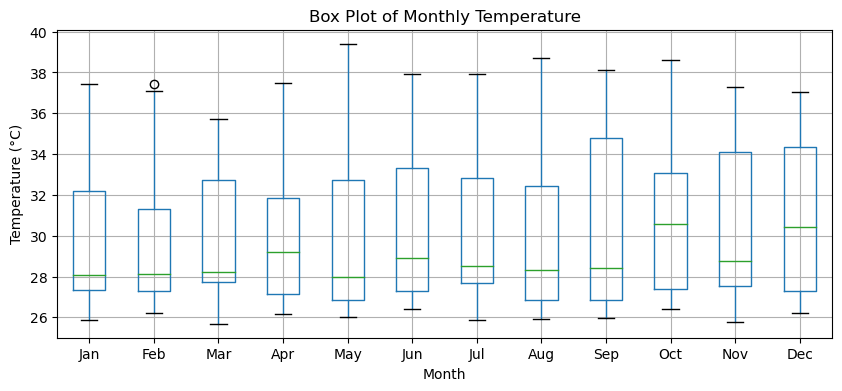

In [86]:
# Convert the date column to datetime and extract month and year
temp_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])  # Replace 'system:time_start' with your date column name
temp_data['Month'] = precip_data['system:time_start'].dt.month
temp_data['Year'] = precip_data['system:time_start'].dt.year

# Calculating monthly averages
monthly_averages = temp_data.groupby(['Year', 'Month']).mean().reset_index()  

# Pivot the data
pivot_data = monthly_averages.pivot(index='Year', columns='Month', values='LST_Day_1km')  # Replace 'LST_Day_1km' with your rainfall column name

# Plotting the box plot
plt.figure(figsize=(10, 4))
pivot_data.boxplot()

plt.title('Box Plot of Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(1, 13),labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.grid(True)
plt.show()

**NDVI**

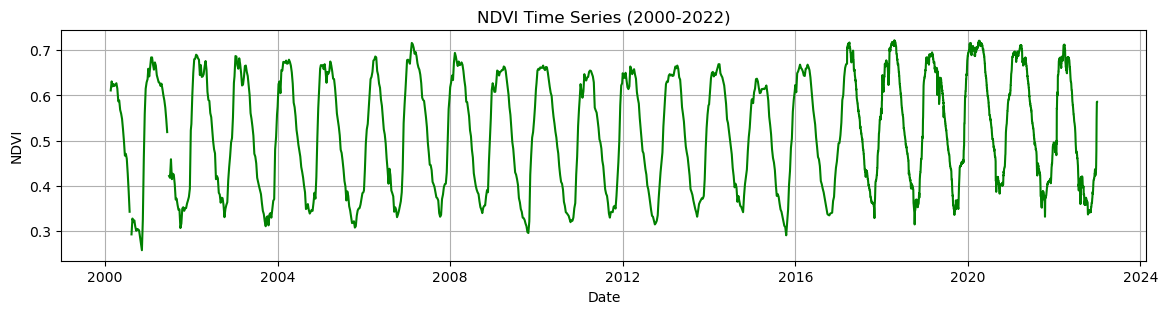

In [329]:

ndvi_data = ndvi_data.rename(columns={'00000000000000000000': 'NDVI'})

ndvi_data['system:time_start'] = pd.to_datetime(ndvi_data['system:time_start'])

plt.figure(figsize=(14, 3))
plt.plot(ndvi_data['system:time_start'], ndvi_data['NDVI'], color='green')
plt.title('NDVI Time Series (2000-2022)')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.grid(True)
plt.show()



**NDWI**

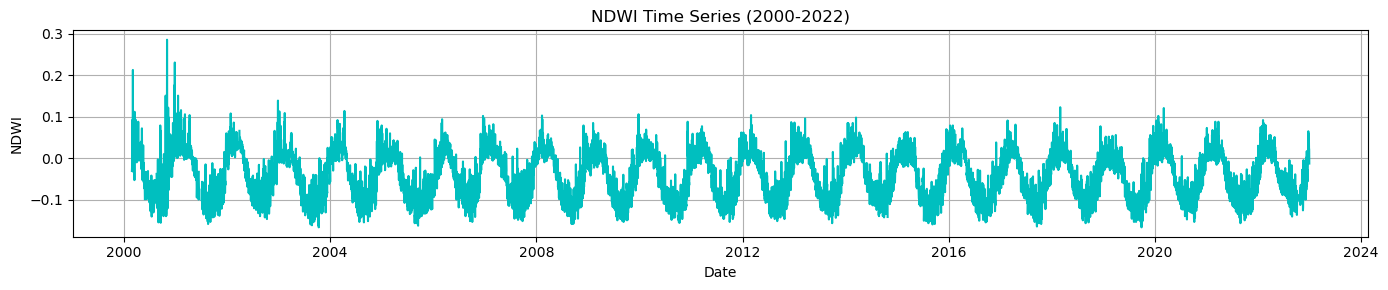

In [416]:
ndwi_data = ndwi_data.rename(columns={'00000000000000000000': 'NDWI'})

ndwi_data['system:time_start'] = pd.to_datetime(ndwi_data['system:time_start'])

plt.figure(figsize=(14, 3))
plt.plot(ndwi_data['system:time_start'], ndwi_data['NDWI'], color='c')
plt.title('NDWI Time Series (2000-2022)')
plt.xlabel('Date')
plt.ylabel('NDWI')
plt.grid(True)
plt.show()

**SOIL MOISTURE**

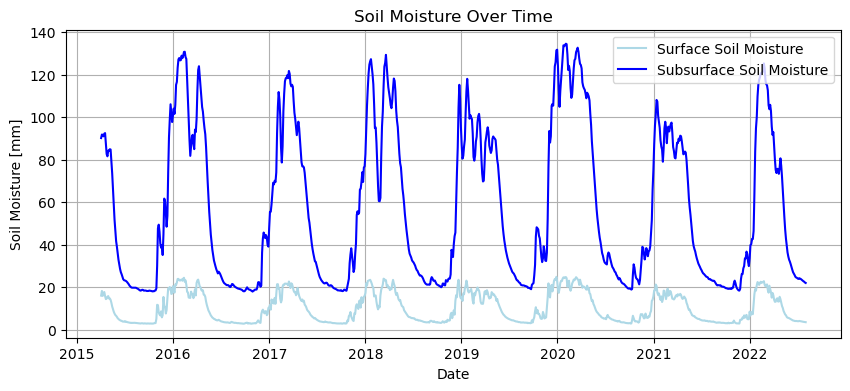

In [30]:
# Load the data from the CSV file
file_path = 'Anomalies in Soil Moisture and Precipitation/soil_moisture.csv'
sm_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
sm_data.head()

# Convert the date column to datetime format for plotting
sm_data['system:time_start'] = pd.to_datetime(sm_data['system:time_start'])

# Plotting the data
plt.figure(figsize=(10, 4))

# Plot for surface soil moisture
plt.plot(sm_data['system:time_start'], sm_data['surface SM'], label='Surface Soil Moisture', color='lightblue')

# Plot for subsurface soil moisture
plt.plot(sm_data['system:time_start'], sm_data['subsurface SM'], label='Subsurface Soil Moisture', color='blue')

# Adding title and labels
plt.title('Soil Moisture Over Time')
plt.xlabel('Date')
plt.ylabel('Soil Moisture [mm]')
           

plt.legend()

# Show the plot
plt.grid(True)
plt.show()


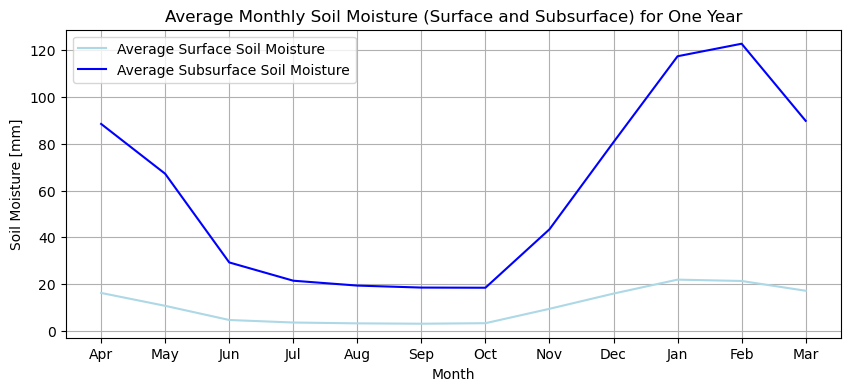

In [29]:

# Convert the date column to datetime format for plotting
sm_data['system:time_start'] = pd.to_datetime(sm_data['system:time_start'])

# Calculating monthly averages for surface and subsurface soil moisture
monthly_avg = sm_data.set_index('system:time_start').resample('M').mean()

# Ensuring the data is for one year and reformatting the index to display months from Jan to Dec
# Since the data might span more than one year, we only take the first 12 months for simplicity
monthly_avg = monthly_avg.iloc[:12]
monthly_avg.index = monthly_avg.index.strftime('%b')

# Plotting the data
plt.figure(figsize=(10, 4))

# Plot for average surface soil moisture
plt.plot(monthly_avg.index, monthly_avg['surface SM'], label='Average Surface Soil Moisture', color='lightblue')

# Plot for average subsurface soil moisture
plt.plot(monthly_avg.index, monthly_avg['subsurface SM'], label='Average Subsurface Soil Moisture', color='blue')

# Adding title and labels
plt.title('Average Monthly Soil Moisture (Surface and Subsurface) for One Year')
plt.xlabel('Month')
plt.ylabel('Soil Moisture [mm]')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

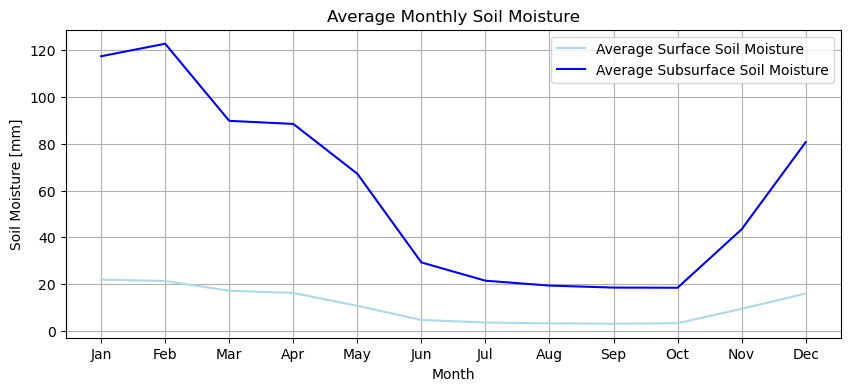

In [28]:
# Sorting the monthly average data to start from January
monthly_avg_sorted = monthly_avg.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plotting the data with January as the starting month
plt.figure(figsize=(10, 4))

# Plot for average surface soil moisture
plt.plot(monthly_avg_sorted.index, monthly_avg_sorted['surface SM'], label='Average Surface Soil Moisture', color='lightblue')

# Plot for average subsurface soil moisture
plt.plot(monthly_avg_sorted.index, monthly_avg_sorted['subsurface SM'], label='Average Subsurface Soil Moisture', color='blue')

# Adding title and labels
plt.title('Average Monthly Soil Moisture')
plt.xlabel('Month')
plt.ylabel('Soil Moisture [mm]')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


**CORRELATIONS**

MERGING ALL DATASETS

In [ ]:

# Ensure date columns are in datetime format (if not already)
# Example: ndvi_data['date'] = pd.to_datetime(ndvi_data['date'])

# Merging the datasets on the date column
merged_data = pd.merge(pd.merge(pd.merge(ndvi_data, precip_data, on='system:time_start', how='outer'), ndwi_data, on='system:time_start', how='outer'), temp_data, on='system:time_start', how='outer')

# Save the merged dataset
merged_data.to_csv('merged_dataset.csv', index=False)

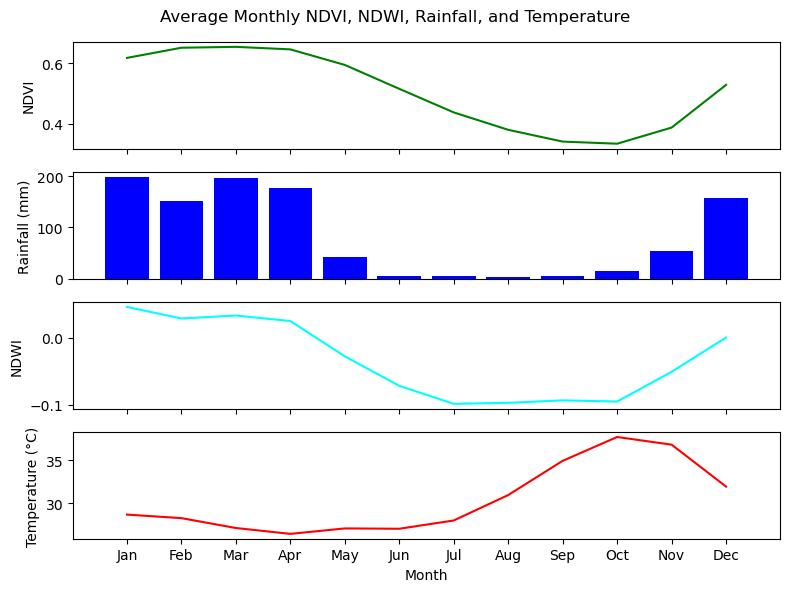

In [153]:
# Load the dataset
merged_data = pd.read_csv('merged_dataset.csv')  # Replace with your file path

# Convert date column to datetime and extract the month and year
merged_data['system:time_start'] = pd.to_datetime(merged_data['system:time_start'])
merged_data['Month'] = merged_data['system:time_start'].dt.month
merged_data['Year'] = merged_data['system:time_start'].dt.year

# Calculate average monthly values
avg_monthly_ndvi = merged_data.groupby('Month')['00000000000000000000_x'].mean()
avg_monthly_ndwi = merged_data.groupby('Month')['00000000000000000000_y'].mean()
avg_total_monthly_precip = merged_data.groupby('Month')['precipitation'].sum() / merged_data['Year'].nunique()
avg_monthly_temp = merged_data.groupby('Month')['LST_Day_1km'].mean()

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

# Plot each variable
# NDVI
axs[0].plot(avg_monthly_ndvi.index, avg_monthly_ndvi, color='green', label='Average Monthly NDVI')
axs[0].set_ylabel('NDVI')
#axs[0].legend(loc='upper right')

# Rainfall
axs[1].bar(avg_total_monthly_precip.index, avg_total_monthly_precip, color='blue', label='Average of Total Monthly Rainfall')
axs[1].set_ylabel('Rainfall (mm)')
#axs[1].legend(loc='upper right')

# NDWI
axs[2].plot(avg_monthly_ndwi.index, avg_monthly_ndwi, color='cyan', label='Average Monthly NDWI')
axs[2].set_ylabel('NDWI')
#axs[2].legend(loc='upper right')

# Temperature
axs[3].plot(avg_monthly_temp.index, avg_monthly_temp, color='red', label='Average Monthly Temperature')
axs[3].set_xlabel('Month')
axs[3].set_ylabel('Temperature (°C)')
#axs[3].legend(loc='upper right')

# Set common x-axis labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=months)

# Overall plot customization
plt.suptitle('Average Monthly NDVI, NDWI, Rainfall, and Temperature')
plt.tight_layout()

# Show plot
plt.show()


**NDVI AND PRECIPITATION**

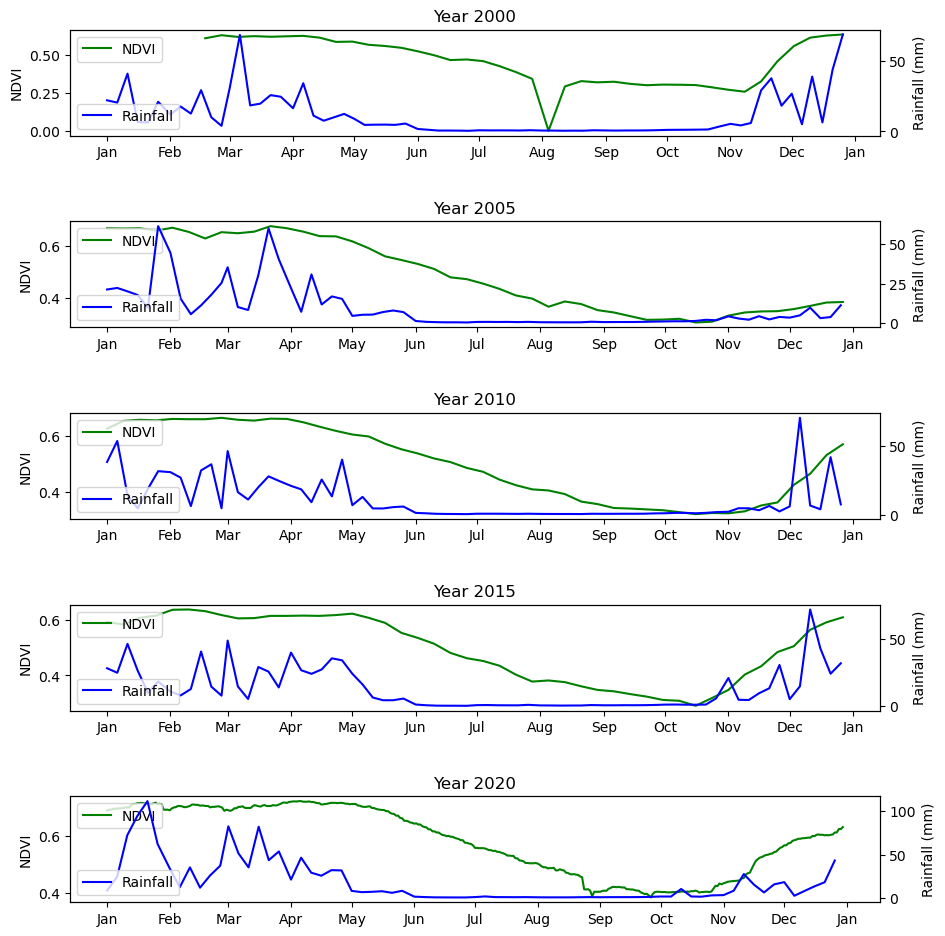

In [256]:

# Convert dates to datetime format
ndvi_data['system:time_start'] = pd.to_datetime(ndvi_data['system:time_start'])
precip_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])

# Filtering for selected years
years = [2000, 2005, 2010, 2015, 2020]
filtered_ndvi = {}
filtered_precip = {}

for year in years:
    filtered_ndvi[year] = ndvi_data[ndvi_data['system:time_start'].dt.year == year]
    filtered_precip[year] = precip_data[precip_data['system:time_start'].dt.year == year]

# Plotting
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

for i, year in enumerate(years):
    # Plot NDVI
    ndvi_line, = axs[i].plot(filtered_ndvi[year]['system:time_start'], filtered_ndvi[year]['00000000000000000000'].fillna(0), 'g-', label='NDVI')

    # Create a second y-axis for precipitation
    ax2 = axs[i].twinx()
    precip_line, = ax2.plot(filtered_precip[year]['system:time_start'], filtered_precip[year]['precipitation'].fillna(0), 'b-', label='Rainfall')

    # Setting titles and labels
    axs[i].set_title(f'Year {year}')
    axs[i].set_ylabel('NDVI')
    ax2.set_ylabel('Rainfall (mm)')

    # Formatting x-axis
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Adding legends outside the graph
    axs[i].legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax2.legend(loc='lower left', bbox_to_anchor=(0, 0))

fig.tight_layout(pad=3.0)
plt.show()

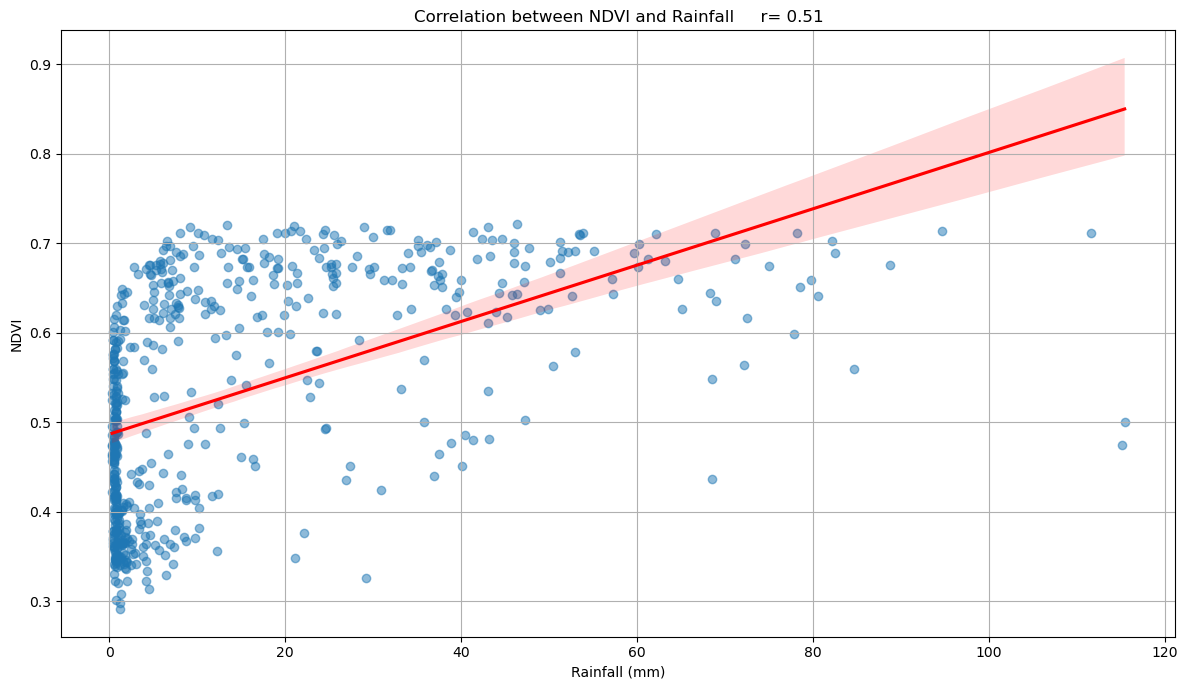

In [407]:
# Merging the NDVI and Precipitation datasets on the 'system:time_start' column for correlation analysis
# Also, renaming the columns as requested: '00000000000000000000' to 'NDVI' and 'precipitation' to 'mm'

merged_data_ndvi_precip = pd.merge(
    ndvi_data.rename(columns={'00000000000000000000': 'NDVI'}),
    precip_data.rename(columns={'precipitation': 'mm'}),
    on='system:time_start',
    how='inner'
)

# Calculating the correlation value between 'NDVI' and 'mm'
correlation_value_ndvi_precip = merged_data_ndvi_precip['NDVI'].corr(merged_data_ndvi_precip['mm'])

# Plotting the scatter plot with a trend line
plt.figure(figsize=(12, 7))
sns.regplot(x='mm', y='NDVI', data=merged_data_ndvi_precip, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

# Adding title with correlation value
plt.title(f"Correlation between NDVI and Rainfall     r= {correlation_value_ndvi_precip:.2f}")
plt.xlabel("Rainfall (mm)")
plt.ylabel("NDVI")
plt.grid(True)
plt.show()


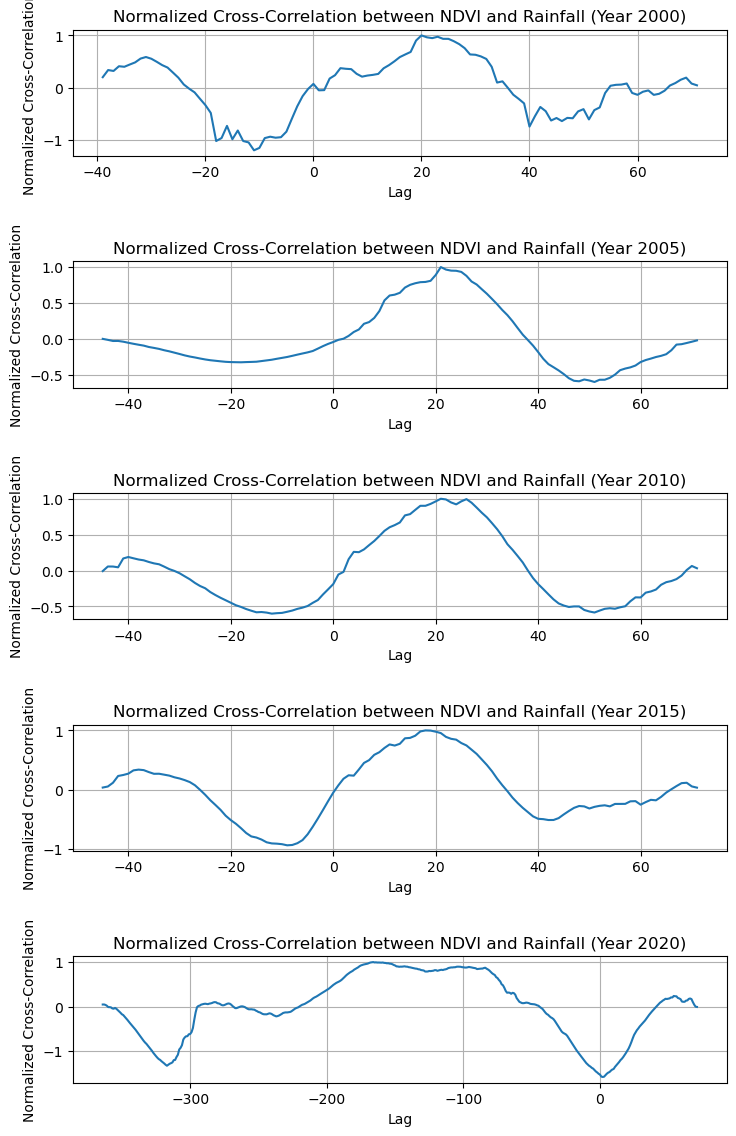

In [258]:
# Calculating and plotting the normalized cross-correlation between NDVI and precipitation for the selected years: 2000, 2005, 2010, 2015

fig, axs = plt.subplots(5, 1, figsize=(8, 12))

for i, year in enumerate(years):
    # Select NDVI and precipitation data for the specific year
    ndvi_data = filtered_ndvi[year]['00000000000000000000'].fillna(0)
    precip_data = filtered_precip[year]['precipitation'].fillna(0)

    # Normalize the data
    ndvi_normalized = (ndvi_data - ndvi_data.mean()) / ndvi_year.std()
    precip_normalized = (precip_data - precip_data.mean()) / precip_year.std()

    # Calculate the normalized cross-correlation
    ncc = correlate(ndvi_normalized, precip_normalized, mode='full')
    ncc /= np.max(ncc)  # Normalize the correlation values

    # Generate lag values
    lags = np.arange(-len(ndvi_normalized) + 1, len(precip_normalized))

    # Plotting
    axs[i].plot(lags, ncc)
    axs[i].set_title(f'Normalized Cross-Correlation between NDVI and Rainfall (Year {year})')
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Normalized Cross-Correlation')
    axs[i].grid(True)

fig.tight_layout(pad=3.0)
plt.show()


**NDWI AND PRECIPITATION**

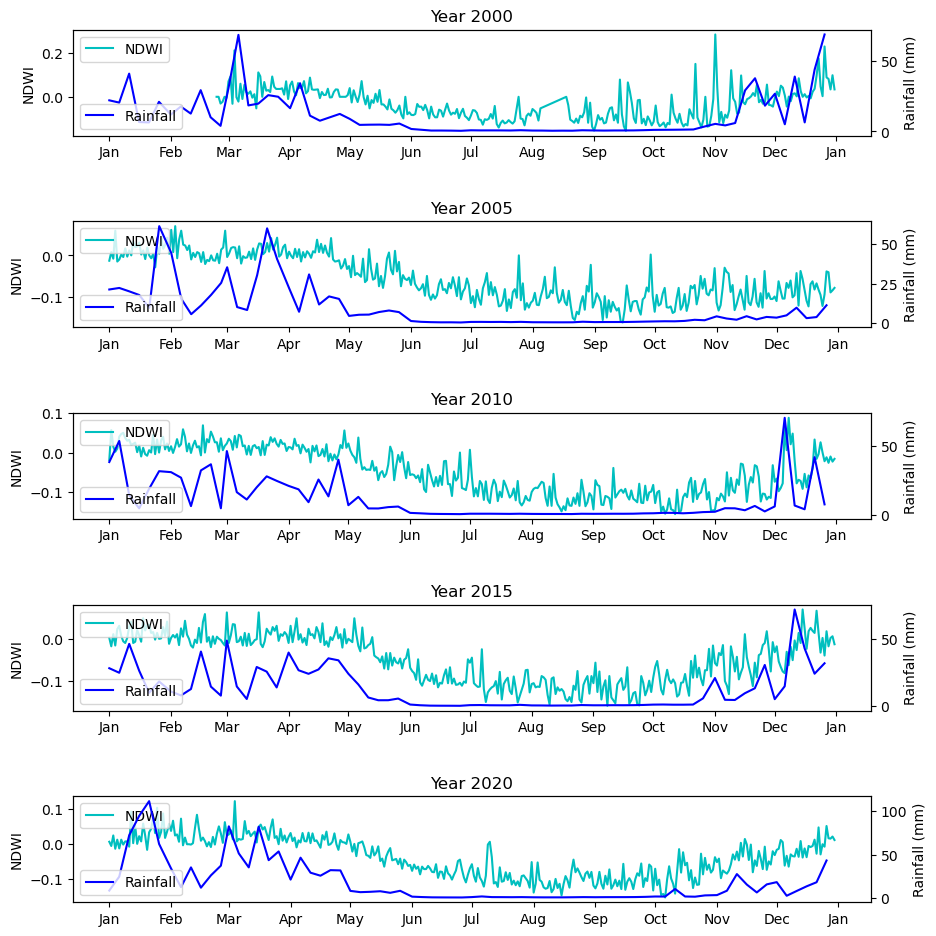

In [261]:

# Convert dates to datetime format
ndwi_data['system:time_start'] = pd.to_datetime(ndwi_data['system:time_start'])
precip_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])

# Filtering for selected years
years = [2000, 2005, 2010, 2015, 2020]
filtered_ndwi = {}
filtered_precip = {}

for year in years:
    filtered_ndwi[year] = ndwi_data[ndwi_data['system:time_start'].dt.year == year]
    filtered_precip[year] = precip_data[precip_data['system:time_start'].dt.year == year]

# Plotting
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

for i, year in enumerate(years):
    # Plot NDWI
    ndwi_line, = axs[i].plot(filtered_ndwi[year]['system:time_start'], filtered_ndwi[year]['00000000000000000000'].fillna(0), 'c-', label='NDWI')

    # Create a second y-axis for precipitation
    ax2 = axs[i].twinx()
    precip_line, = ax2.plot(filtered_precip[year]['system:time_start'], filtered_precip[year]['precipitation'].fillna(0), 'b-', label='Rainfall')

    # Setting titles and labels
    axs[i].set_title(f'Year {year}')
    axs[i].set_ylabel('NDWI')
    ax2.set_ylabel('Rainfall (mm)')

    # Formatting x-axis
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Adding legends outside the graph
    axs[i].legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax2.legend(loc='lower left', bbox_to_anchor=(0, 0))

fig.tight_layout(pad=3.0)
plt.show()

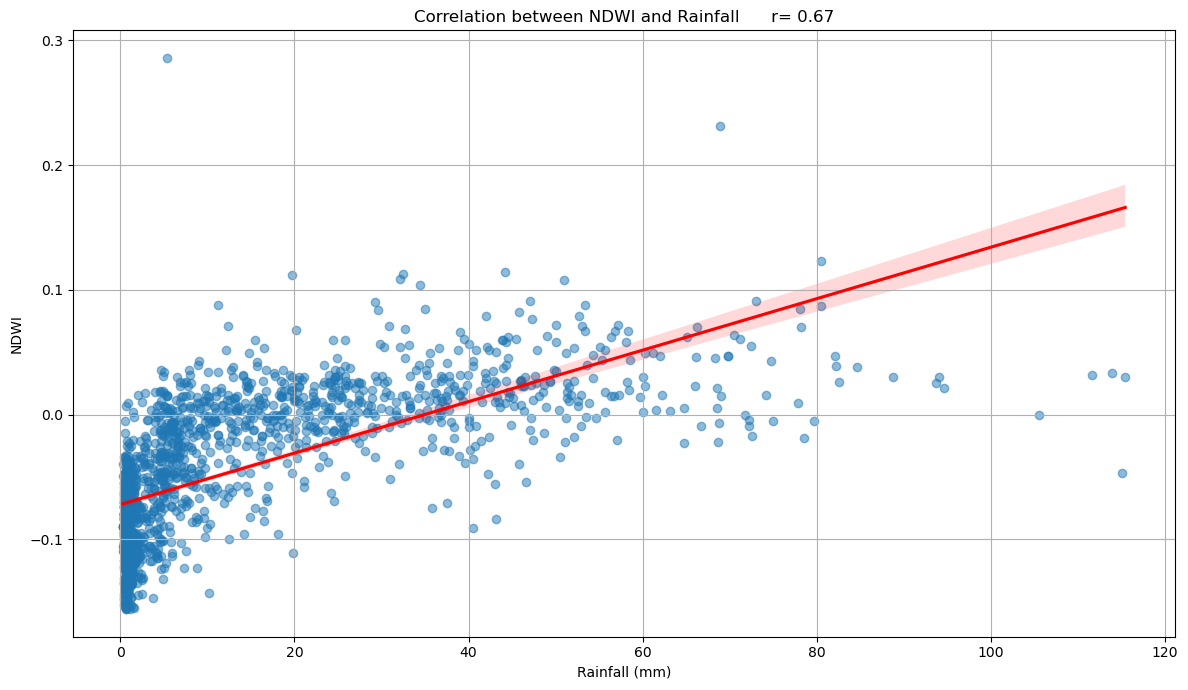

In [408]:
# Merging the NDVI and Precipitation datasets on the 'system:time_start' column for correlation analysis
# Also, renaming the columns as requested: '00000000000000000000' to 'NDVI' and 'precipitation' to 'mm'

merged_data_ndwi_precip = pd.merge(
    ndwi_data.rename(columns={'00000000000000000000': 'NDWI'}),
    precip_data.rename(columns={'precipitation': 'mm'}),
    on='system:time_start',
    how='inner'
)

# Calculating the correlation value between 'NDVI' and 'mm'
correlation_value_ndwi_precip = merged_data_ndwi_precip['NDWI'].corr(merged_data_ndwi_precip['mm'])

# Plotting the scatter plot with a trend line
plt.figure(figsize=(12, 7))
sns.regplot(x='mm', y='NDWI', data=merged_data_ndwi_precip, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

# Adding title with correlation value
plt.title(f"Correlation between NDWI and Rainfall      r= {correlation_value_ndwi_precip:.2f}")
plt.xlabel("Rainfall (mm)")
plt.ylabel("NDWI")
plt.grid(True)
plt.show()


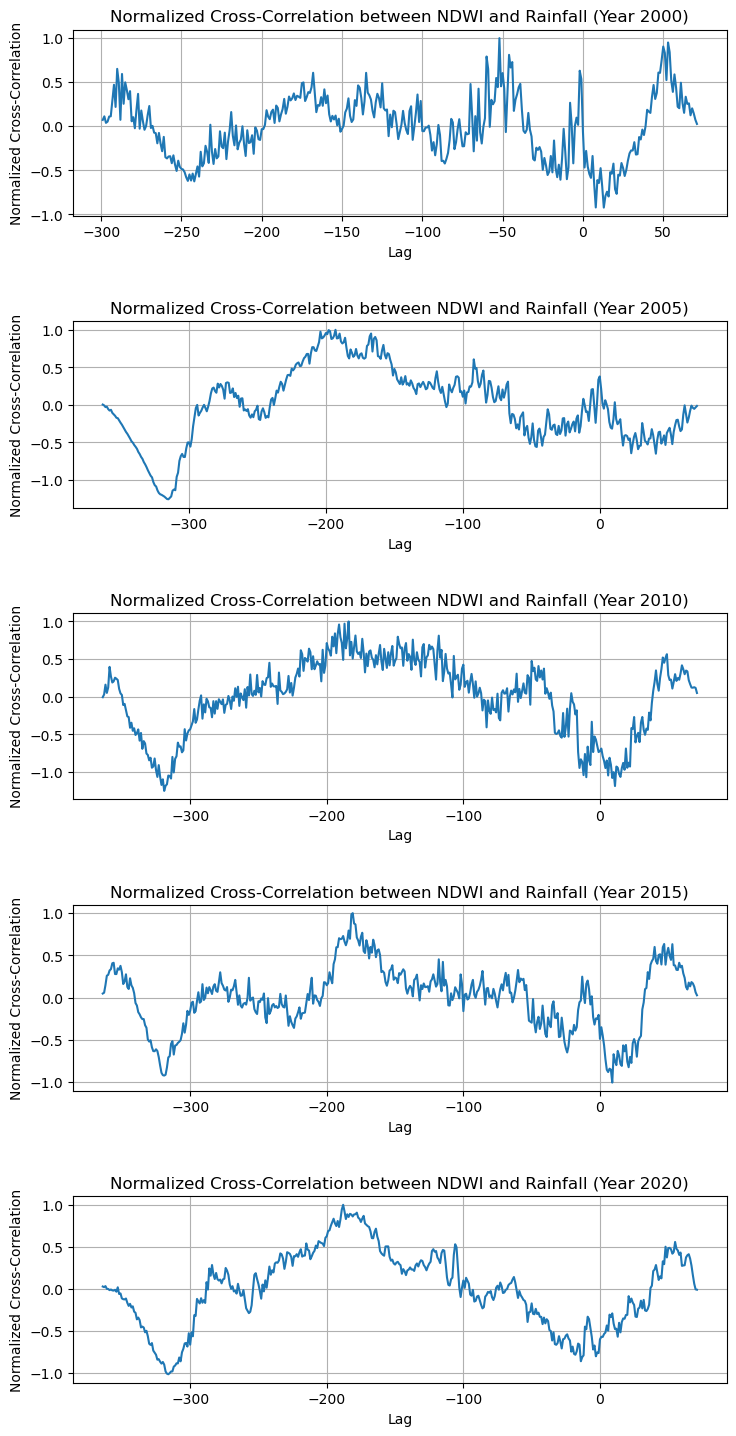

In [275]:

# Convert dates to datetime format for both datasets
ndwi_data['system:time_start'] = pd.to_datetime(ndwi_data['system:time_start'])
precip_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])

# Filtering the datasets for the selected years: 2000, 2005, 2010, 2015, 2020
years = [2000, 2005, 2010, 2015, 2020]
filtered_ndwi = {}
filtered_precip = {}

for year in years:
    filtered_ndwi[year] = ndwi_data[ndwi_data['system:time_start'].dt.year == year]
    filtered_precip[year] = precip_data[precip_data['system:time_start'].dt.year == year]

# Plotting normalized cross-correlation for each selected year
fig, axs = plt.subplots(5, 1, figsize=(8, 15))

for i, year in enumerate(years):
    # Select NDWI and precipitation data for the year
    ndwi_year = filtered_ndwi[year]['00000000000000000000'].fillna(0)
    precip_year = filtered_precip[year]['precipitation'].fillna(0)

    # Normalize the data
    ndwi_normalized = (ndwi_year - ndwi_year.mean()) / ndwi_year.std()
    precip_normalized = (precip_year - precip_year.mean()) / precip_year.std()

    # Calculate normalized cross-correlation
    ncc = correlate(ndwi_normalized, precip_normalized, mode='full')
    ncc /= np.max(ncc)  # Normalize the correlation values

    # Generate lag values
    lags = np.arange(-len(ndwi_normalized) + 1, len(precip_normalized))

    # Plotting
    axs[i].plot(lags, ncc)
    axs[i].set_title(f'Normalized Cross-Correlation between NDWI and Rainfall (Year {year})')
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Normalized Cross-Correlation')
    axs[i].grid(True)
    

fig.tight_layout(pad=3.0)
plt.show()

**TEMPERATURE AND RAINFALL**

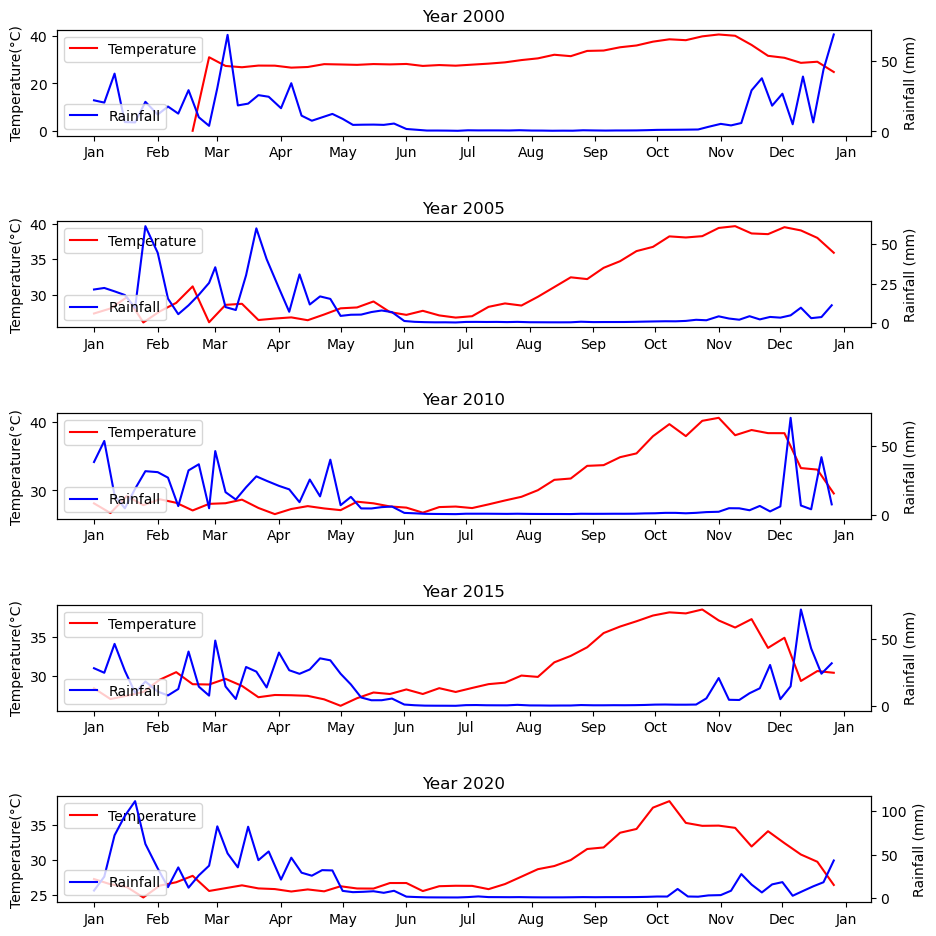

In [271]:
# Convert dates to datetime format
temp_data['system:time_start'] = pd.to_datetime(temp_data['system:time_start'])
precip_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])

# Filtering for selected years
years = [2000, 2005, 2010, 2015, 2020]
filtered_temp = {}
filtered_precip = {}

for year in years:
    filtered_temp[year] = temp_data[temp_data['system:time_start'].dt.year == year]
    filtered_precip[year] = precip_data[precip_data['system:time_start'].dt.year == year]

# Plotting
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

for i, year in enumerate(years):
    # Plot Temperature
    temp_line, = axs[i].plot(filtered_temp[year]['system:time_start'], filtered_temp[year]['LST_Day_1km'].fillna(0), 'r-', label='Temperature')

    # Create a second y-axis for precipitation
    ax2 = axs[i].twinx()
    precip_line, = ax2.plot(filtered_precip[year]['system:time_start'], filtered_precip[year]['precipitation'].fillna(0), 'b-', label='Rainfall')

    # Setting titles and labels
    axs[i].set_title(f'Year {year}')
    axs[i].set_ylabel('Temperature(°C)')
    ax2.set_ylabel('Rainfall (mm)')

    # Formatting x-axis
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Adding legends outside the graph
    axs[i].legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax2.legend(loc='lower left', bbox_to_anchor=(0, 0))

fig.tight_layout(pad=3.0)
plt.show()

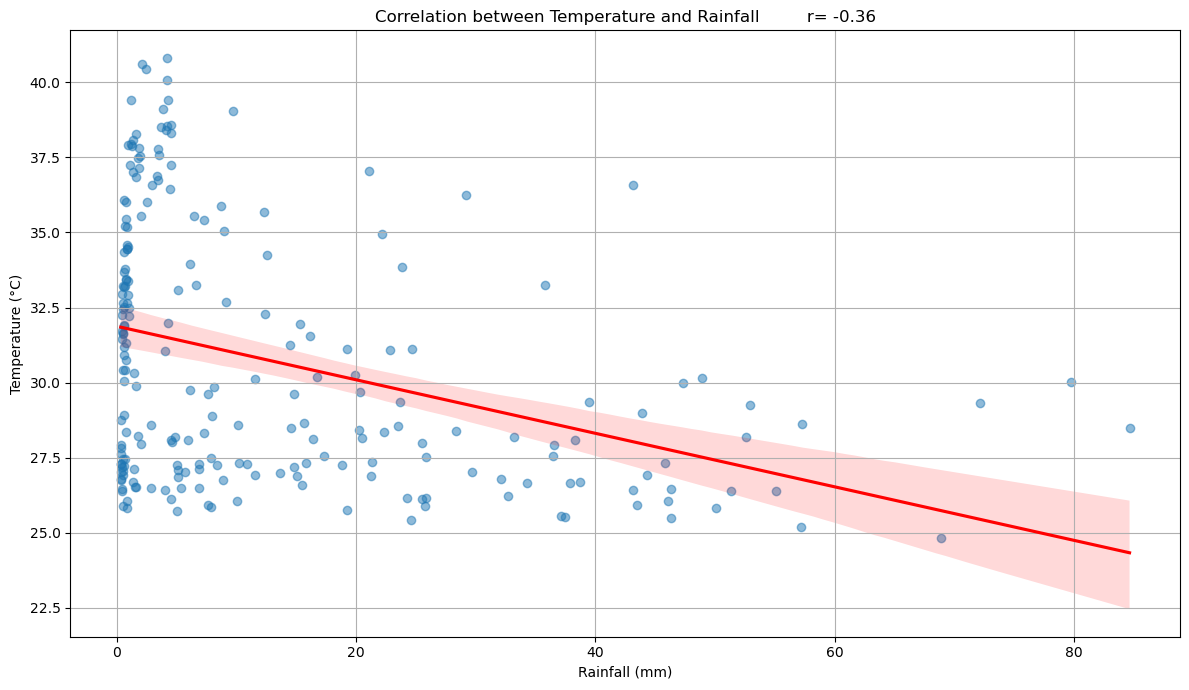

In [415]:
# Merging the NDVI and Precipitation datasets on the 'system:time_start' column for correlation analysis
# Also, renaming the columns as requested: 'LST_Day_1km' to 'Temperature' and 'precipitation' to 'mm'

merged_data_temp_precip = pd.merge(
    temp_data.rename(columns={'LST_Day_1km': 'Temperature'}),
    precip_data.rename(columns={'precipitation': 'mm'}),
    on='system:time_start',
    how='inner'
)

# Calculating the correlation value between 'NDVI' and 'mm'
correlation_value_temp_precip = merged_data_temp_precip['Temperature'].corr(merged_data_temp_precip['mm'])

# Plotting the scatter plot with a trend line
plt.figure(figsize=(12, 7))
sns.regplot(x='mm', y='Temperature', data=merged_data_temp_precip, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

# Adding title with correlation value
plt.title(f"Correlation between Temperature and Rainfall         r= {correlation_value_temp_precip:.2f}")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

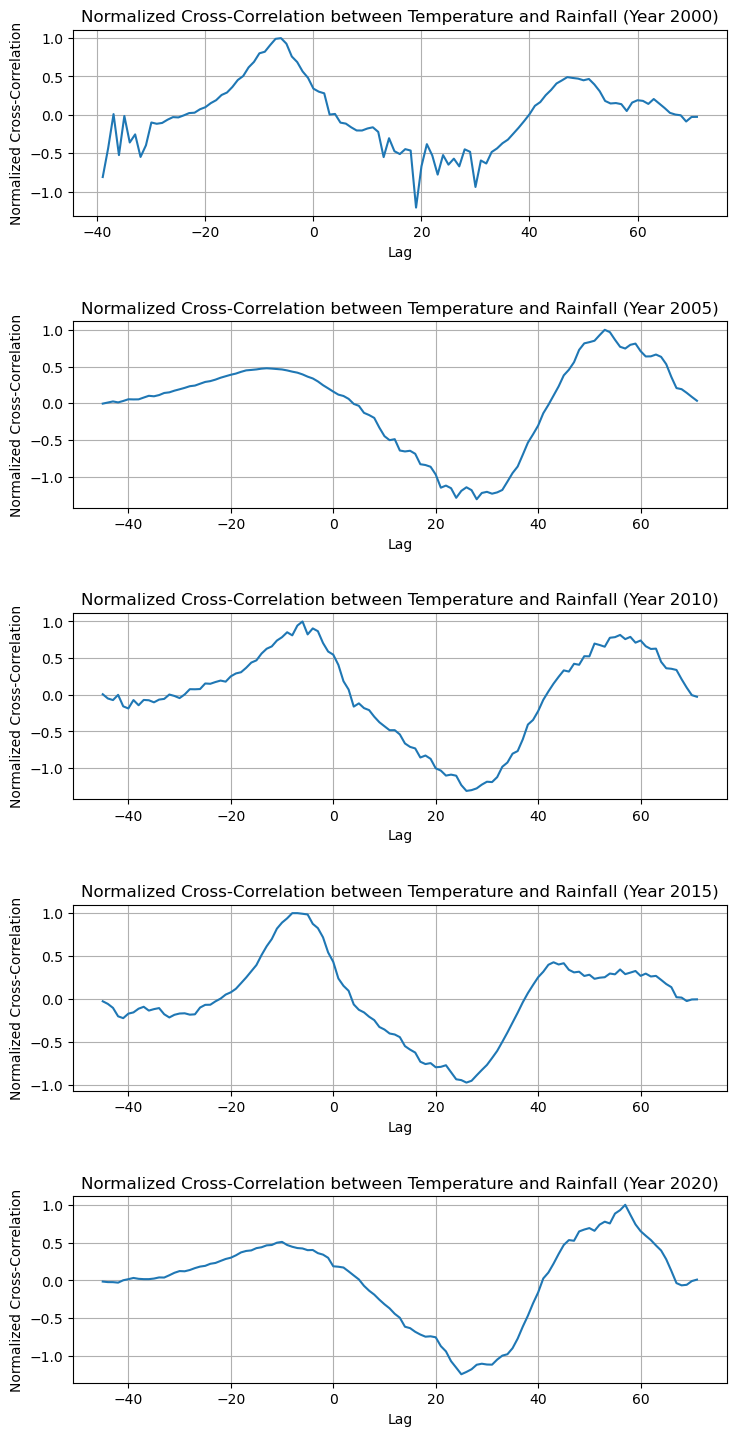

In [274]:

# Convert dates to datetime format for both datasets
temp_data['system:time_start'] = pd.to_datetime(temp_data['system:time_start'])
precip_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])

# Filtering the datasets for the selected years: 2000, 2005, 2010, 2015, 2020
years = [2000, 2005, 2010, 2015, 2020]
filtered_temp = {}
filtered_precip = {}

for year in years:
    filtered_temp[year] = temp_data[temp_data['system:time_start'].dt.year == year]
    filtered_precip[year] = precip_data[precip_data['system:time_start'].dt.year == year]

# Plotting normalized cross-correlation for each selected year
fig, axs = plt.subplots(5, 1, figsize=(8, 15))

for i, year in enumerate(years):
    # Select Temperature and precipitation data for the year
    temp_year = filtered_temp[year]['LST_Day_1km'].fillna(0)
    precip_year = filtered_precip[year]['precipitation'].fillna(0)

    # Normalize the data
    temp_normalized = (temp_year - temp_year.mean()) / temp_year.std()
    precip_normalized = (precip_year - precip_year.mean()) / precip_year.std()

    # Calculate normalized cross-correlation
    ncc = correlate(temp_normalized, precip_normalized, mode='full')
    ncc /= np.max(ncc)  # Normalize the correlation values

    # Generate lag values
    lags = np.arange(-len(temp_normalized) + 1, len(precip_normalized))

    # Plotting
    axs[i].plot(lags, ncc)
    #axs[i].plot(lags, ncc, label=f'NCC NDWI-Precipitation (Year {year})')
    axs[i].set_title(f'Normalized Cross-Correlation between Temperature and Rainfall (Year {year})')
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Normalized Cross-Correlation')
    axs[i].grid(True)
    #axs[i].legend()

fig.tight_layout(pad=3.0)
plt.show()

**NDVI AND NDWI**

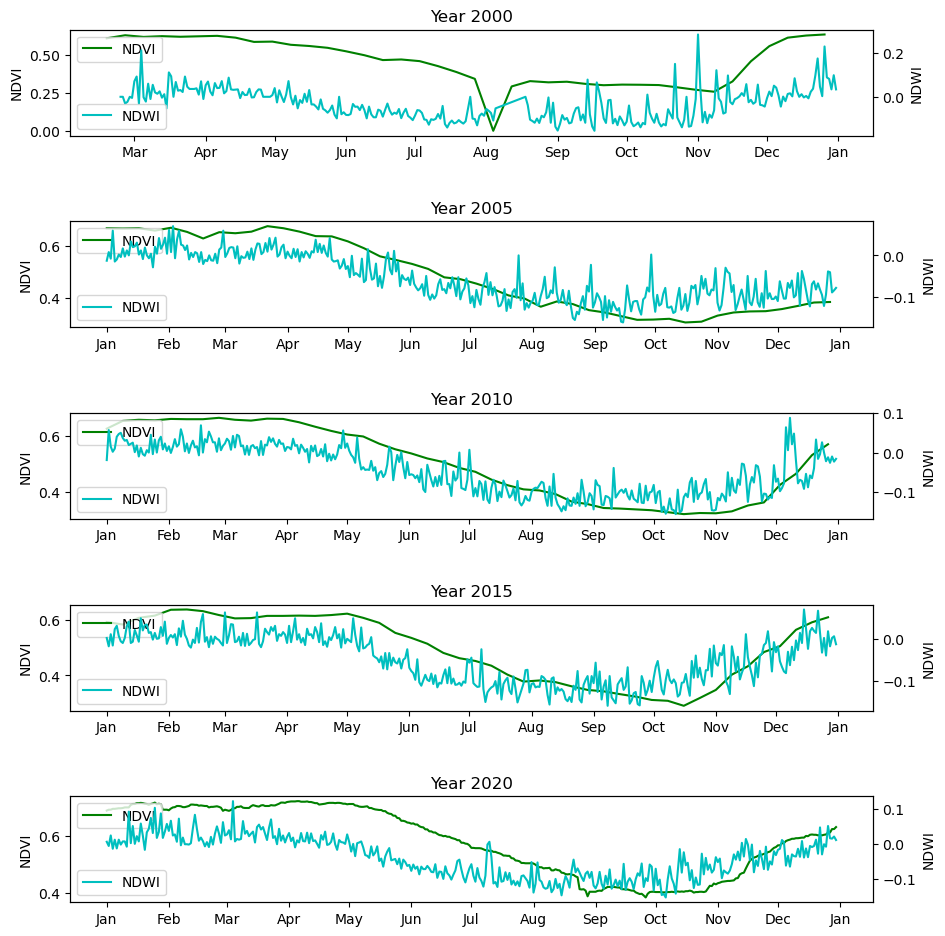

In [304]:
# Convert dates to datetime format
ndvi_data['system:time_start'] = pd.to_datetime(ndvi_data['system:time_start'])
ndwi_data['system:time_start'] = pd.to_datetime(ndwi_data['system:time_start'])

# Filtering for selected years
years = [2000, 2005, 2010, 2015, 2020]
filtered_ndvi = {}
filtered_ndwi = {}

for year in years:
    filtered_ndvi[year] = ndvi_data[ndvi_data['system:time_start'].dt.year == year]
    filtered_ndwi[year] = ndwi_data[ndwi_data['system:time_start'].dt.year == year]

# Plotting
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

for i, year in enumerate(years):
    # Plot NDVI
    ndvi_line, = axs[i].plot(filtered_ndvi[year]['system:time_start'], filtered_ndvi[year]['00000000000000000000'].fillna(0), 'g-', label='NDVI')

    # Create a second y-axis for NDWI
    ax2 = axs[i].twinx()
    ndwi_line, = ax2.plot(filtered_ndwi[year]['system:time_start'], filtered_ndwi[year]['00000000000000000000'].fillna(0), 'c-', label='NDWI')

    # Setting titles and labels
    axs[i].set_title(f'Year {year}')
    axs[i].set_ylabel('NDVI')
    ax2.set_ylabel('NDWI')

    # Formatting x-axis
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Adding legends outside the graph
    axs[i].legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax2.legend(loc='lower left', bbox_to_anchor=(0, 0))

fig.tight_layout(pad=3.0)
plt.show()

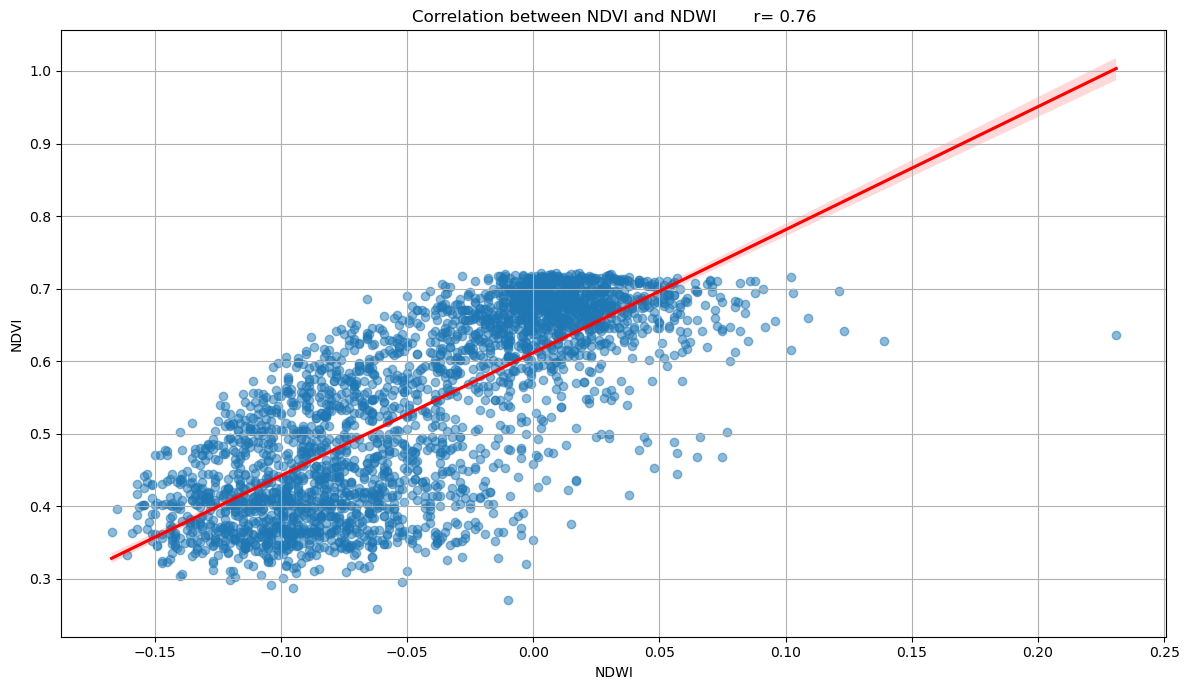

In [410]:
# Merging the NDVI and NDWI datasets on the 'system:time_start' column for correlation analysis
# Also, renaming the columns as requested: '00000000000000000000' to 'NDVI' and '00000000000000000000' to 'NDWI'

merged_data_ndvi_ndwi = pd.merge(
    ndvi_data.rename(columns={'00000000000000000000': 'NDVI'}),
    ndwi_data.rename(columns={'00000000000000000000': 'NDWI'}),
    on='system:time_start',
    how='inner'
)

# Calculating the correlation value between 'NDVI' and 'mm'
correlation_value_ndvi_ndwi = merged_data_ndvi_ndwi['NDVI'].corr(merged_data_ndvi_ndwi['NDWI'])

# Plotting the scatter plot with a trend line
plt.figure(figsize=(12, 7))
sns.regplot(x='NDWI', y='NDVI', data=merged_data_ndvi_ndwi, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

# Adding title with correlation value
plt.title(f"Correlation between NDVI and NDWI       r= {correlation_value_ndvi_ndwi:.2f}")
plt.xlabel("NDWI")
plt.ylabel("NDVI")
plt.grid(True)
plt.show()

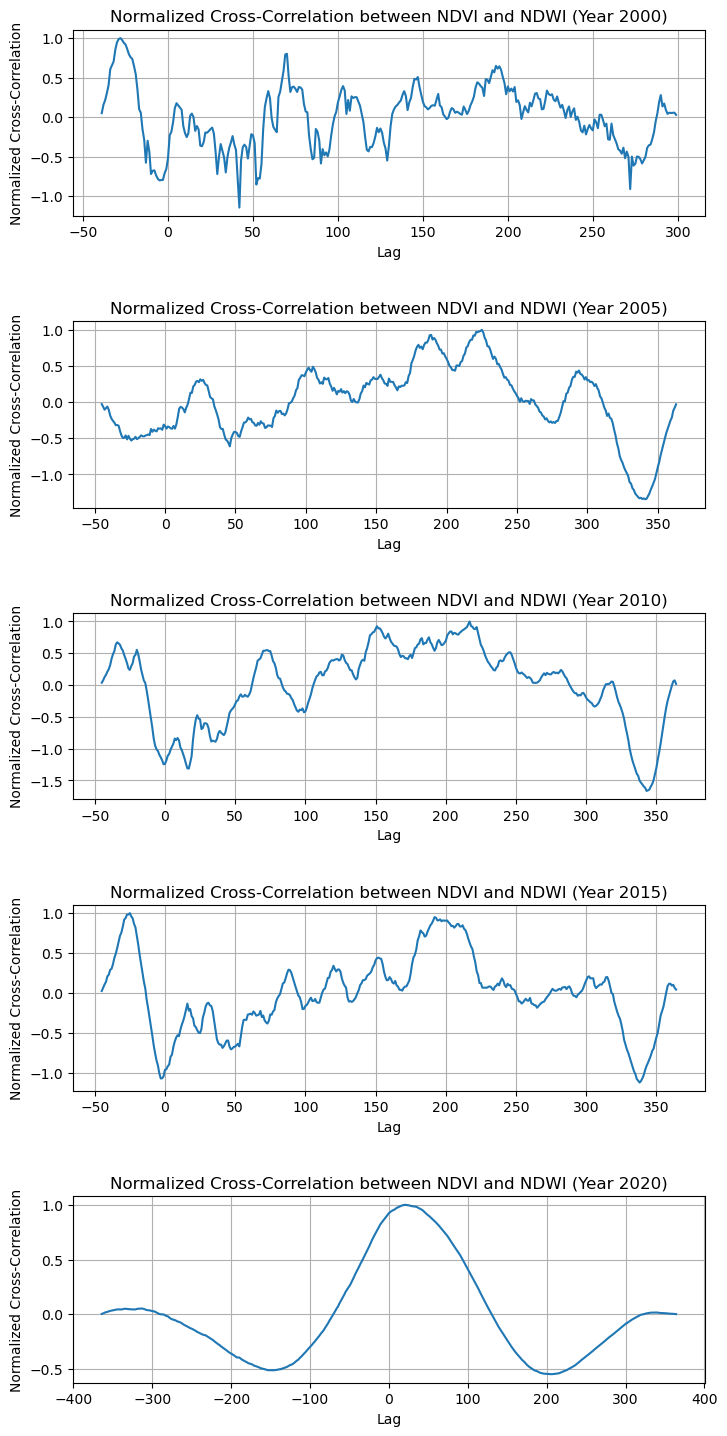

In [285]:
# Convert dates to datetime format for both datasets
ndvi_data['system:time_start'] = pd.to_datetime(ndvi_data['system:time_start'])
ndwi_data['system:time_start'] = pd.to_datetime(ndwi_data['system:time_start'])

# Filtering the datasets for the selected years: 2000, 2005, 2010, 2015, 2020
years = [2000, 2005, 2010, 2015, 2020]
filtered_ndvi = {}
filtered_ndwi = {}

for year in years:
    filtered_ndvi[year] = ndvi_data[ndvi_data['system:time_start'].dt.year == year]
    filtered_ndwi[year] = ndwi_data[ndwi_data['system:time_start'].dt.year == year]

# Plotting normalized cross-correlation for each selected year
fig, axs = plt.subplots(5, 1, figsize=(8, 15))

for i, year in enumerate(years):
    # Select NDVI and NDWI data for the year
    ndvi_year = filtered_ndvi[year]['00000000000000000000'].fillna(0)
    ndwi_year = filtered_ndwi[year]['00000000000000000000'].fillna(0)

    # Normalize the data
    ndvi_normalized = (ndvi_year - ndvi_year.mean()) / ndvi_year.std()
    ndwi_normalized = (ndwi_year - ndwi_year.mean()) / ndwi_year.std()

    # Calculate normalized cross-correlation
    ncc = correlate(ndvi_normalized, ndwi_normalized, mode='full')
    ncc /= np.max(ncc)  # Normalize the correlation values

    # Generate lag values
    lags = np.arange(-len(ndvi_normalized) + 1, len(ndwi_normalized))

    # Plotting
    axs[i].plot(lags, ncc)
    axs[i].set_title(f'Normalized Cross-Correlation between NDVI and NDWI (Year {year})')
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Normalized Cross-Correlation')
    axs[i].grid(True)
    

fig.tight_layout(pad=3.0)
plt.show()

**LAND SURFACE TEMPERSTURE AND NDWI**

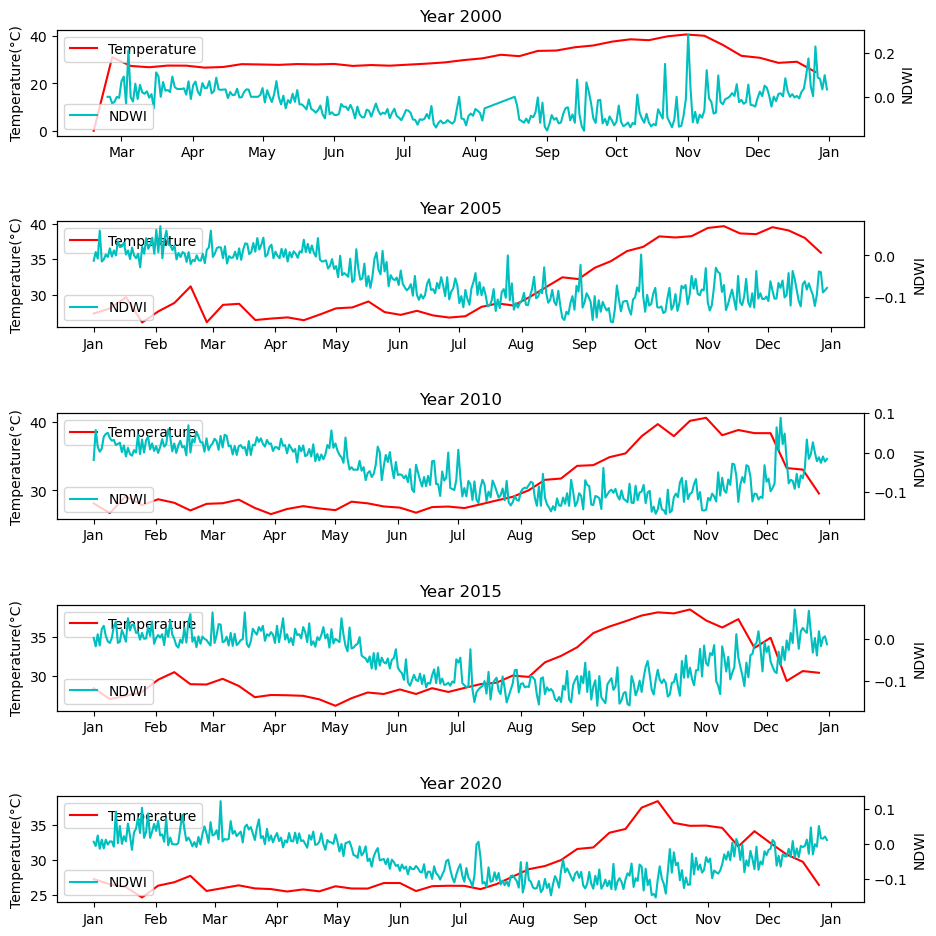

In [308]:
# Convert dates to datetime format
temp_data['system:time_start'] = pd.to_datetime(temp_data['system:time_start'])
ndwi_data['system:time_start'] = pd.to_datetime(ndwi_data['system:time_start'])

# Filtering for selected years
years = [2000, 2005, 2010, 2015, 2020]
filtered_temp = {}
filtered_ndwi = {}

for year in years:
    filtered_temp[year] = temp_data[temp_data['system:time_start'].dt.year == year]
    filtered_ndwi[year] = ndwi_data[ndwi_data['system:time_start'].dt.year == year]

# Plotting
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

for i, year in enumerate(years):
    # Plot Temperature
    temp_line, = axs[i].plot(filtered_temp[year]['system:time_start'], filtered_temp[year]['LST_Day_1km'].fillna(0), 'r-', label='Temperature')

    # Create a second y-axis for NDWI
    ax2 = axs[i].twinx()
    ndwi_line, = ax2.plot(filtered_ndwi[year]['system:time_start'], filtered_ndwi[year]['00000000000000000000'].fillna(0), 'c-', label='NDWI')

    # Setting titles and labels
    axs[i].set_title(f'Year {year}')
    axs[i].set_ylabel('Temperature(°C)')
    ax2.set_ylabel('NDWI')

    # Formatting x-axis
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Adding legends outside the graph
    axs[i].legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax2.legend(loc='lower left', bbox_to_anchor=(0, 0))

fig.tight_layout(pad=3.0)
plt.show()

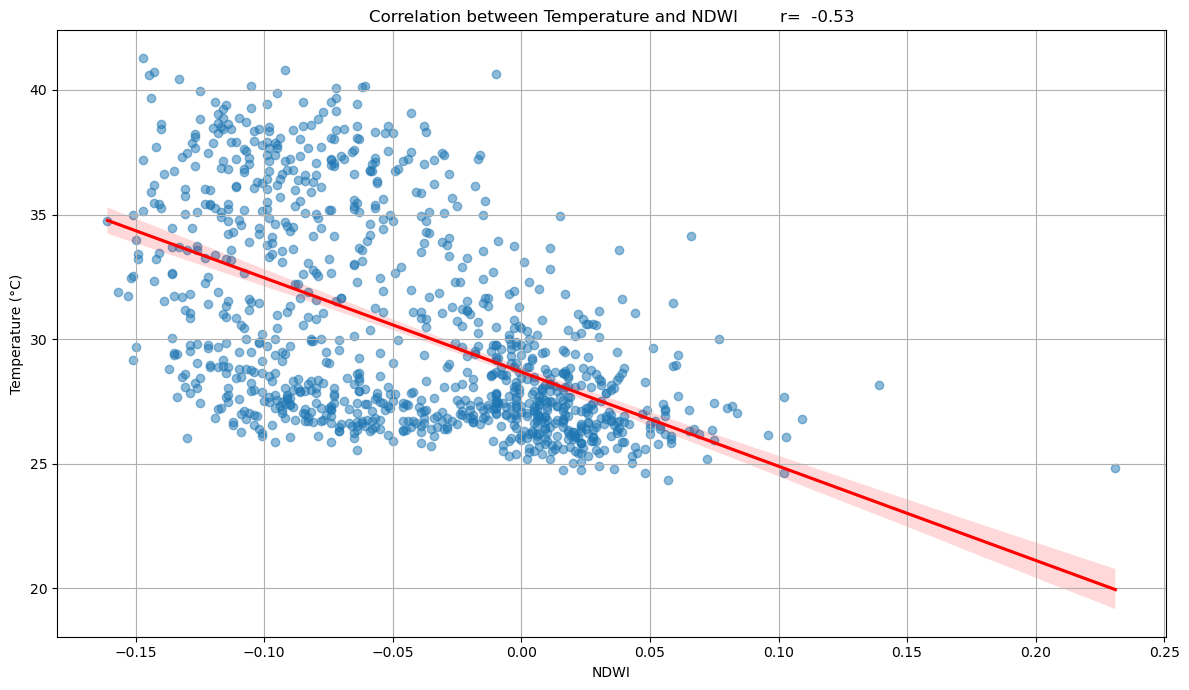

In [414]:
# Merging the Temperature and NDWI datasets on the 'system:time_start' column for correlation analysis
# Also, renaming the columns as requested: 'LST_Day_1km' to 'Temperature' and '00000000000000000000' to 'NDWI'

merged_data_temp_ndwi = pd.merge(
    temp_data.rename(columns={'LST_Day_1km': 'Temperature'}),
    ndwi_data.rename(columns={'00000000000000000000': 'NDWI'}),
    on='system:time_start',
    how='inner'
)

# Calculating the correlation value between 'Temperature' and 'NDWI'
correlation_value_temp_ndwi = merged_data_temp_ndwi['Temperature'].corr(merged_data_temp_ndwi['NDWI'])

# Plotting the scatter plot with a trend line
plt.figure(figsize=(12, 7))
sns.regplot(x='NDWI', y='Temperature', data=merged_data_temp_ndwi, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

# Adding title with correlation value
plt.title(f"Correlation between Temperature and NDWI        r=  {correlation_value_temp_ndwi:.2f}")
plt.xlabel("NDWI")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

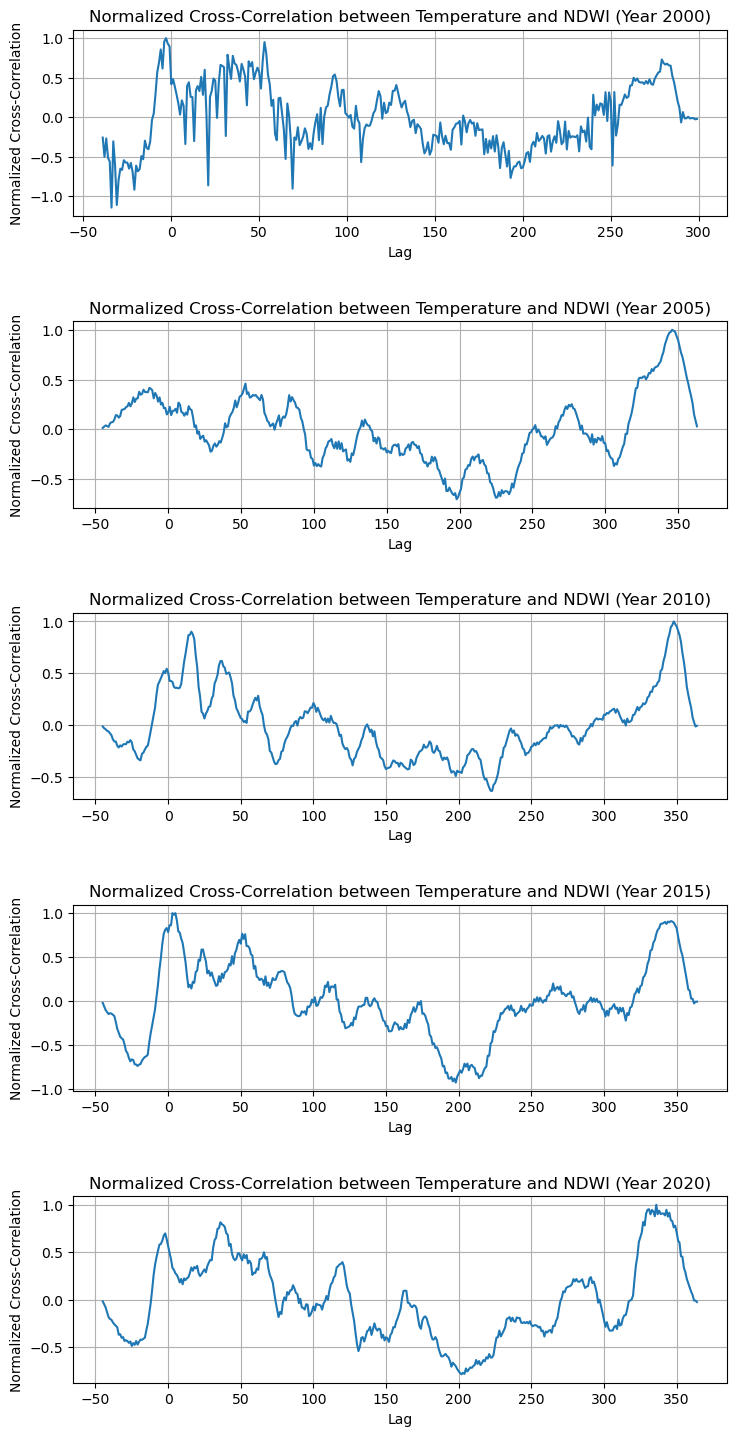

In [297]:

# Convert dates to datetime format for both datasets
temp_data['system:time_start'] = pd.to_datetime(temp_data['system:time_start'])
ndwi_data['system:time_start'] = pd.to_datetime(ndwi_data['system:time_start'])

# Filtering the datasets for the selected years: 2000, 2005, 2010, 2015, 2020
years = [2000, 2005, 2010, 2015, 2020]
filtered_temp = {}
filtered_ndwi = {}

for year in years:
    filtered_temp[year] = temp_data[temp_data['system:time_start'].dt.year == year]
    filtered_ndwi[year] = ndwi_data[ndwi_data['system:time_start'].dt.year == year]

# Plotting normalized cross-correlation for each selected year
fig, axs = plt.subplots(5, 1, figsize=(8, 15))

for i, year in enumerate(years):
    # Select Temperature and NDWI data for the year
    temp_year = filtered_temp[year]['LST_Day_1km'].fillna(0)
    ndwi_year = filtered_ndwi[year]['00000000000000000000'].fillna(0)

    # Normalize the data
    temp_normalized = (temp_year - temp_year.mean()) / temp_year.std()
    ndwi_normalized = (ndwi_year - ndwi_year.mean()) / ndwi_year.std()

    # Calculate normalized cross-correlation
    ncc = correlate(temp_normalized, ndwi_normalized, mode='full')
    ncc /= np.max(ncc)  # Normalize the correlation values

    # Generate lag values
    lags = np.arange(-len(temp_normalized) + 1, len(ndwi_normalized))

    # Plotting
    axs[i].plot(lags, ncc)
    #axs[i].plot(lags, ncc, label=f'NCC NDWI-Precipitation (Year {year})')
    axs[i].set_title(f'Normalized Cross-Correlation between Temperature and NDWI (Year {year})')
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Normalized Cross-Correlation')
    axs[i].grid(True)
    #axs[i].legend()

fig.tight_layout(pad=3.0)
plt.show()

**LAND SURFACE TEMPERATURE AND NDVI**

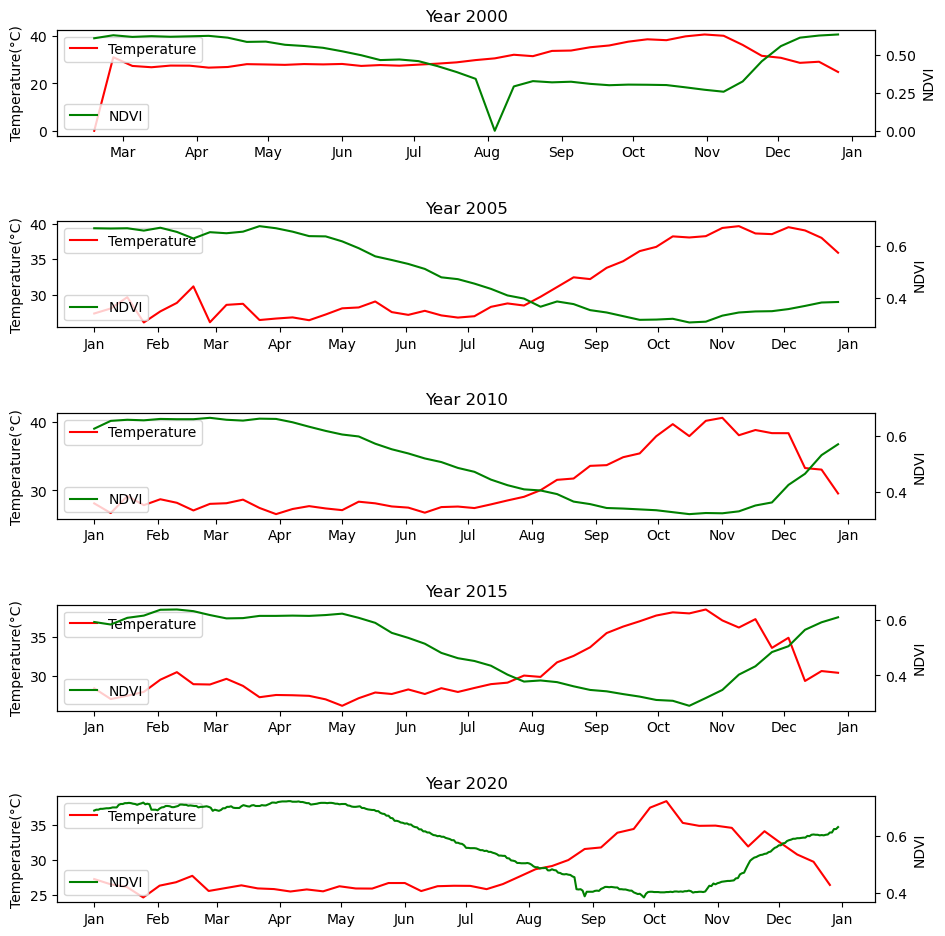

In [303]:
# Convert dates to datetime format
temp_data['system:time_start'] = pd.to_datetime(temp_data['system:time_start'])
ndvi_data['system:time_start'] = pd.to_datetime(ndvi_data['system:time_start'])

# Filtering for selected years
years = [2000, 2005, 2010, 2015, 2020]
filtered_temp = {}
filtered_ndvi = {}

for year in years:
    filtered_temp[year] = temp_data[temp_data['system:time_start'].dt.year == year]
    filtered_ndvi[year] = ndvi_data[ndvi_data['system:time_start'].dt.year == year]

# Plotting
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

for i, year in enumerate(years):
    # Plot Temperature
    temp_line, = axs[i].plot(filtered_temp[year]['system:time_start'], filtered_temp[year]['LST_Day_1km'].fillna(0), 'r-', label='Temperature')

    # Create a second y-axis for NDVI
    ax2 = axs[i].twinx()
    ndvi_line, = ax2.plot(filtered_ndvi[year]['system:time_start'], filtered_ndvi[year]['00000000000000000000'].fillna(0), 'g-', label='NDVI')

    # Setting titles and labels
    axs[i].set_title(f'Year {year}')
    axs[i].set_ylabel('Temperature(°C)')
    ax2.set_ylabel('NDVI')

    # Formatting x-axis
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Adding legends outside the graph
    axs[i].legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax2.legend(loc='lower left', bbox_to_anchor=(0, 0))

fig.tight_layout(pad=3.0)
plt.show()

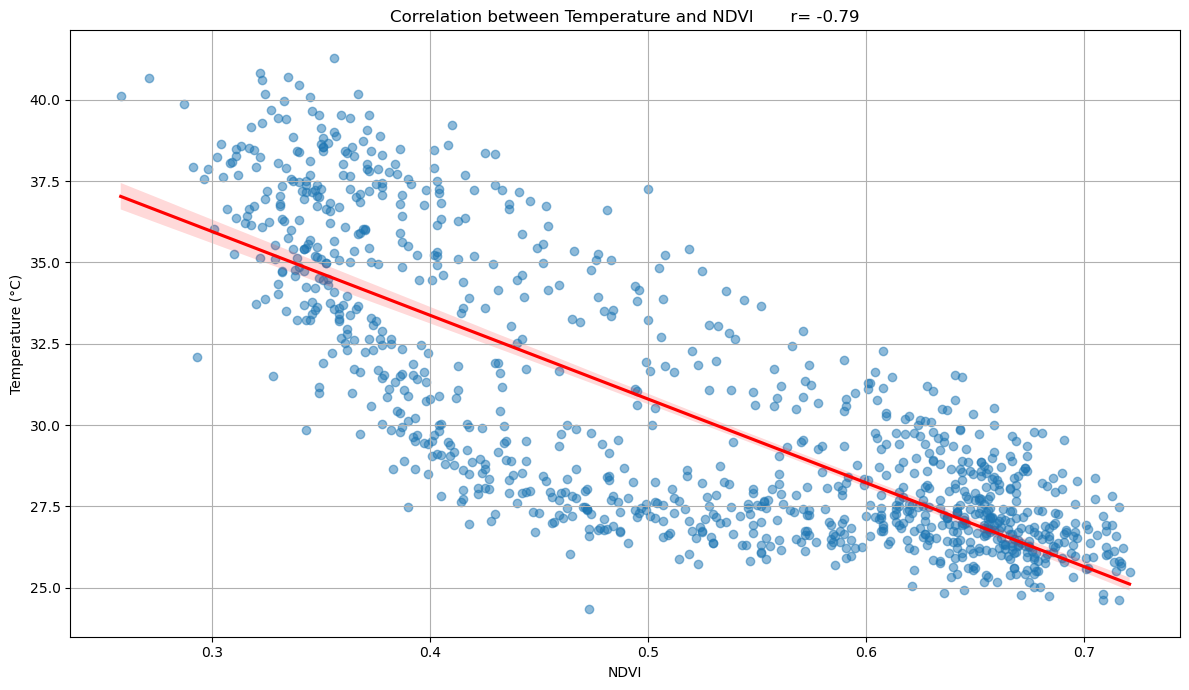

In [412]:
# Merging the Temperature and NDVI datasets on the 'system:time_start' column for correlation analysis
# Also, renaming the columns as requested: 'LST_Day_1km' to 'Temperature' and '00000000000000000000' to 'NDWI'

merged_data_temp_ndvi = pd.merge(
    temp_data.rename(columns={'LST_Day_1km': 'Temperature'}),
    ndvi_data.rename(columns={'00000000000000000000': 'NDVI'}),
    on='system:time_start',
    how='inner'
)

# Calculating the correlation value between 'Temperature' and 'NDWI'
correlation_value_temp_ndvi = merged_data_temp_ndvi['Temperature'].corr(merged_data_temp_ndvi['NDVI'])

# Plotting the scatter plot with a trend line
plt.figure(figsize=(12, 7))
sns.regplot(x='NDVI', y='Temperature', data=merged_data_temp_ndvi, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

# Adding title with correlation value
plt.title(f"Correlation between Temperature and NDVI       r= {correlation_value_temp_ndvi:.2f}")
plt.xlabel("NDVI")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

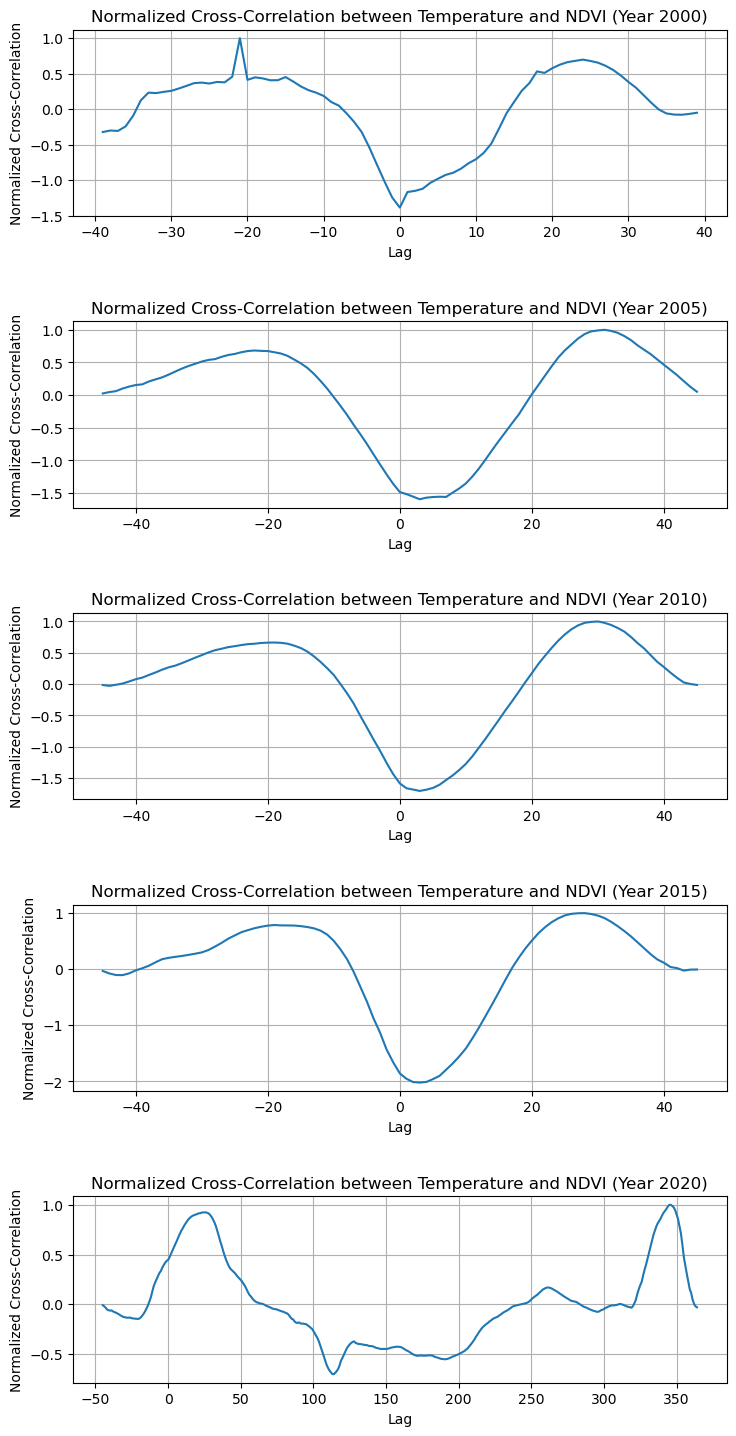

In [312]:
# Convert dates to datetime format for both datasets
temp_data['system:time_start'] = pd.to_datetime(temp_data['system:time_start'])
ndvi_data['system:time_start'] = pd.to_datetime(ndvi_data['system:time_start'])

# Filtering the datasets for the selected years: 2000, 2005, 2010, 2015, 2020
years = [2000, 2005, 2010, 2015, 2020]
filtered_temp = {}
filtered_ndvi = {}

for year in years:
    filtered_temp[year] = temp_data[temp_data['system:time_start'].dt.year == year]
    filtered_ndvi[year] = ndvi_data[ndvi_data['system:time_start'].dt.year == year]

# Plotting normalized cross-correlation for each selected year
fig, axs = plt.subplots(5, 1, figsize=(8, 15))

for i, year in enumerate(years):
    # Select Temperature and NDWI data for the year
    temp_year = filtered_temp[year]['LST_Day_1km'].fillna(0)
    ndvi_year = filtered_ndvi[year]['00000000000000000000'].fillna(0)

    # Normalize the data
    temp_normalized = (temp_year - temp_year.mean()) / temp_year.std()
    ndvi_normalized = (ndvi_year - ndvi_year.mean()) / ndvi_year.std()

    # Calculate normalized cross-correlation
    ncc = correlate(temp_normalized, ndvi_normalized, mode='full')
    ncc /= np.max(ncc)  # Normalize the correlation values

    # Generate lag values
    lags = np.arange(-len(temp_normalized) + 1, len(ndvi_normalized))

    # Plotting
    axs[i].plot(lags, ncc)
    #axs[i].plot(lags, ncc, label=f'NCC NDWI-Precipitation (Year {year})')
    axs[i].set_title(f'Normalized Cross-Correlation between Temperature and NDVI (Year {year})')
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Normalized Cross-Correlation')
    axs[i].grid(True)
    #axs[i].legend()

fig.tight_layout(pad=3.0)
plt.show()

**SOIL MOISTURE AND NDVI**

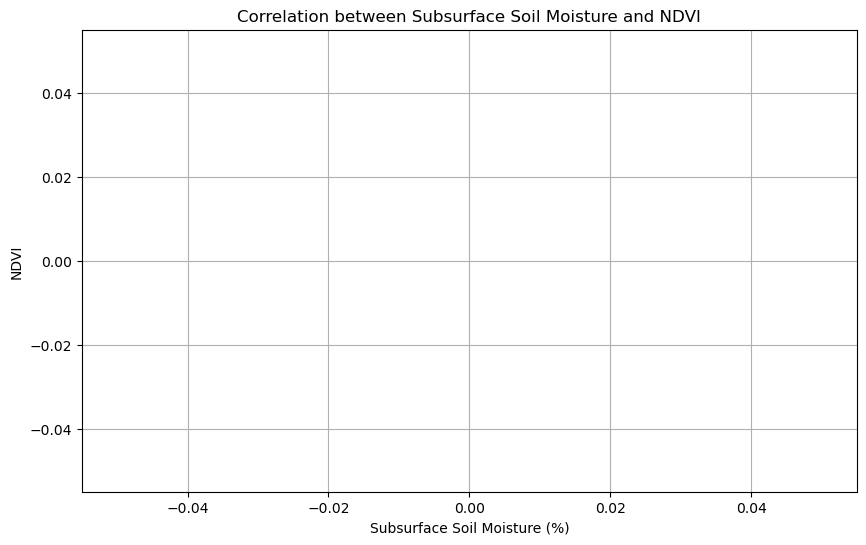

nan

In [52]:

# Convert the 'system:time_start' to datetime
sm_data['system:time_start'] = pd.to_datetime(sm_data['system:time_start'])

# Filter the data for the dates between 2nd April 2015 to 2nd August 2022
sm_data = sm_data[(sm_data['system:time_start'] >= '2015-04-02') & 
                                        (sm_data['system:time_start'] <= '2022-08-02')]

# Load the NDVI data
#ndvi_path = '/mnt/data/NDVI_2000_2022.csv'
#ndvi_data = pd.read_csv(ndvi_path)

# Convert the 'system:time_start' to datetime
ndvi_data['system:time_start'] = pd.to_datetime(ndvi_data['system:time_start'])

# Filter the data for the dates between 2nd April 2015 to 2nd August 2022
ndvi_data = ndvi_data[(ndvi_data['system:time_start'] >= '2015-04-02') & 
                      (ndvi_data['system:time_start'] <= '2022-08-02')]

# Since we cannot directly correlate the datasets without a common 'system:time_start', 
# we need to merge them on this column.
combined_data = pd.merge(sm_data, ndvi_data, on='system:time_start', how='inner')

# Check the combined data
combined_data.head()

# Plotting the correlation between 'subsurface SM' and '00000000000000000000' from the combined data
plt.figure(figsize=(10, 6))

# Using Seaborn to plot and get a regression line
sns.regplot(x='subsurface SM', y='00000000000000000000', data=combined_data)

# Adding title and labels
plt.title('Correlation between Subsurface Soil Moisture and NDVI')
plt.xlabel('Subsurface Soil Moisture (%)')
plt.ylabel('NDVI')

# Show the plot
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = combined_data['subsurface SM'].corr(combined_data['00000000000000000000'])
correlation


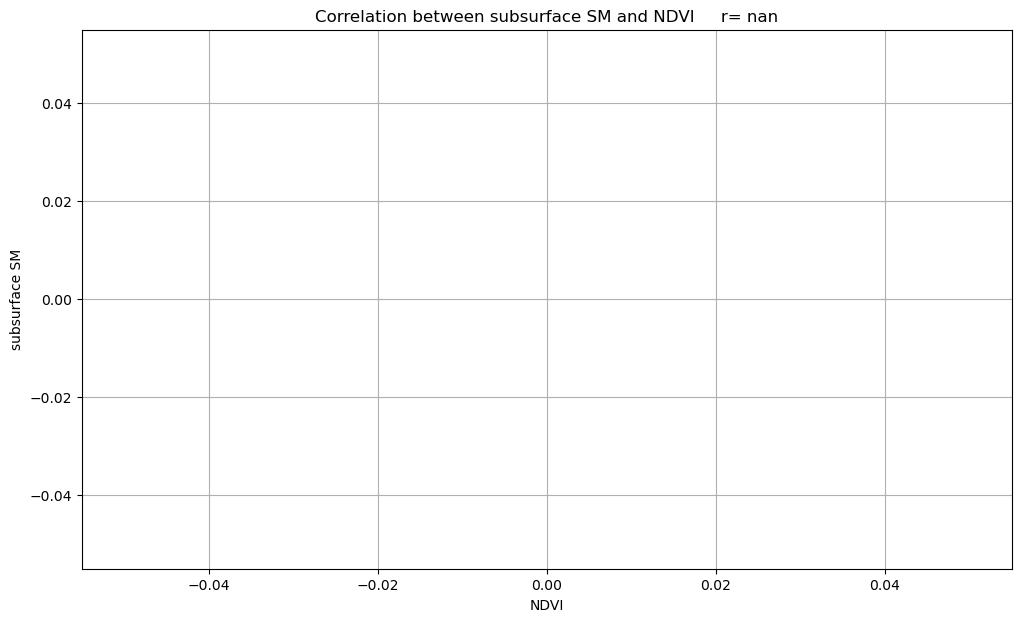

In [53]:
merged_data_sm_ndvi = pd.merge(
    sm_data.rename(columns={'subsurface SM': 'subsurface SM'}),
    ndvi_data.rename(columns={'00000000000000000000': 'NDVI'}),
    on='system:time_start',
    how='inner'
)

# Calculating the correlation value between 'NDVI' and 'mm'
correlation_value_sm_ndvi = merged_data_sm_ndvi['subsurface SM'].corr(merged_data_sm_ndvi['NDVI'])

# Plotting the scatter plot with a trend line
plt.figure(figsize=(12, 7))
sns.regplot(x='NDVI', y='subsurface SM', data=merged_data_sm_ndvi, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

# Adding title with correlation value
plt.title(f"Correlation between subsurface SM and NDVI     r= {correlation_value_sm_ndvi:.2f}")
plt.xlabel("NDVI")
plt.ylabel("subsurface SM")
plt.grid(True)
plt.show()

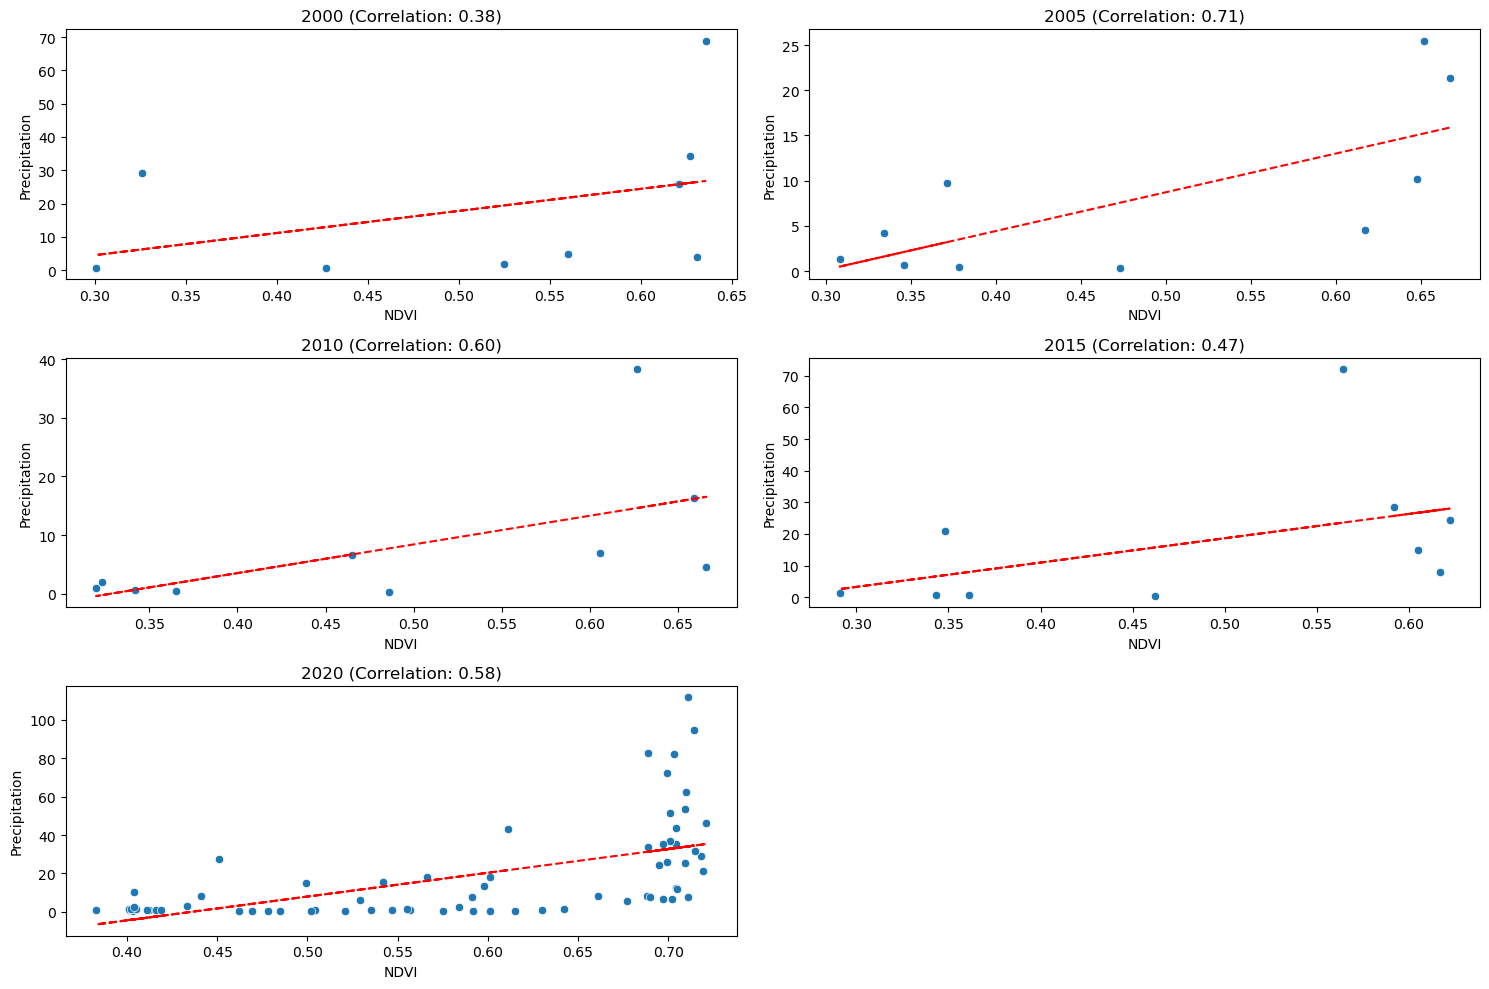

In [394]:
# Convert the date columns to datetime objects for easier handling
ndvi_data['system:time_start'] = pd.to_datetime(ndvi_data['system:time_start'])
precip_data['system:time_start'] = pd.to_datetime(precip_data['system:time_start'])

# Merge the datasets on the date column
merged_df = pd.merge(ndvi_data, precip_data, on='system:time_start')

# Filter the data for the years 2000, 2005, 2010, 2015, and 2020
years = [2000, 2005, 2010, 2015, 2020]
filtered_data = {year: merged_df[merged_df['system:time_start'].dt.year == year] for year in years}

# Creating scatter plots with trend lines and correlation coefficients for each year
plt.figure(figsize=(15, 10))

for i, year in enumerate(years, 1):
    data = filtered_data[year]
    plt.subplot(3, 2, i)
    sns.scatterplot(x='00000000000000000000', y='precipitation', data=data)
    
    # Calculate the trendline
    z = np.polyfit(data['00000000000000000000'], data['precipitation'], 1)
    p = np.poly1d(z)
    plt.plot(data['00000000000000000000'], p(data['00000000000000000000']), "r--")
    
    # Calculate and display the correlation coefficient
    corr_coef = np.corrcoef(data['00000000000000000000'], data['precipitation'])[0, 1]
    plt.title(f"{year} (Correlation: {corr_coef:.2f})")
    plt.xlabel('NDVI')
    plt.ylabel('Precipitation')

plt.tight_layout()
plt.show()